In [3]:
! pip install Clustergram

Defaulting to user installation because normal site-packages is not writeable
--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/segment.py", line 249, in split_lines
    for segment in segments:
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1283, in render
    renderable = rich_cast(renderable)
  File 

In [1]:
import momepy as mm
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import geopandas as gpd
from clustergram import Clustergram
import pickle

import matplotlib.pyplot as plt
from bokeh.io import output_notebook
from bokeh.plotting import show

/usr/local/lib/python3.8/dist-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
path = '/home/jovyan/private/Thesis/nai_train_data/allnew_formal_grids.shapefile/'
formal_grids= gpd.read_file(path + 'allnew_formal_grids.shp')
formal_grids.head()

,ORIG_FID,Dist_ATM,Dist_Banks,Dist_Clin,Dist_Col,Dist_ComC,Dist_Dump,Dist_Hosp,Dist_Indus,Dist_Kind,...,bSqu_Theil,bERI_Gini_,bERI_Shann,bERI_Simps,bERI_Theil,grid_area,blg_densit,intersecti,coverage_p,geometry
0,41,3827.53,3405.88,3420.53,6477.65,9476.29,9650.91,6519.20,1513.27,9027.18,...,2.018607,0.006018,0.230852,0.896656,0.000660,10000.0,0.0007,5324.833233,53.248332,"POLYGON ((266983.509 9871665.525, 266883.509 9..."
1,42,3744.33,3330.17,3395.59,6493.84,9489.47,9669.02,6527.63,1529.71,9035.49,...,2.749321,0.008733,0.407149,0.804828,0.000768,10000.0,0.0004,5815.486104,58.154861,"POLYGON ((267083.509 9871665.525, 266983.509 9..."
2,55,2765.86,2505.99,3337.66,6835.20,9752.95,9993.00,6772.00,1802.78,9241.75,...,2.505497,0.025145,0.921804,0.437816,0.001300,10000.0,0.0002,8184.906562,81.849066,"POLYGON ((268383.509 9871665.525, 268283.509 9..."
3,56,2701.85,2459.67,3354.10,6870.95,9780.08,10024.50,6800.74,1838.48,9264.99,...,2.451795,0.027792,0.881225,0.455733,0.001561,10000.0,0.0008,5112.803692,51.128037,"POLYGON ((268483.509 9871665.525, 268383.509 9..."
4,72,3440.93,3041.38,3238.83,6453.68,9436.63,9631.72,6462.97,1523.15,8967.72,...,2.868880,0.011286,0.514502,0.709336,0.000589,10000.0,0.0005,9099.707184,90.997072,"POLYGON ((267383.509 9871565.525, 267283.509 9..."


(<AxesSubplot: >, (31294, 121))

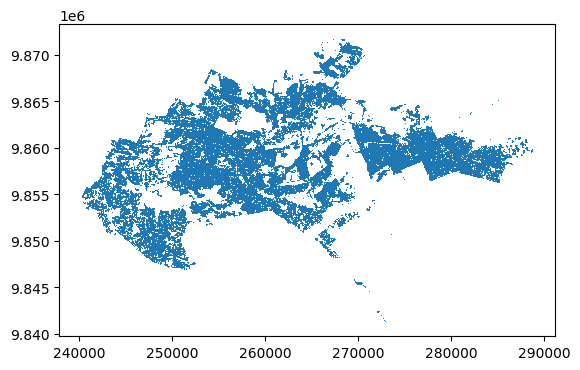

In [3]:
formal_grids.plot(), formal_grids.shape

In [4]:
for col in formal_grids.columns:
    print(col)

ORIG_FID
Dist_ATM
Dist_Banks
Dist_Clin
Dist_Col
Dist_ComC
Dist_Dump
Dist_Hosp
Dist_Indus
Dist_Kind
Dist_Marke
Dist_PlayG
Dist_Polic
Dist_Resta
Dist_River
Dist_Sch
Dist_Uni
NDVI
ZonalSt_Sl
building_c
height_m
area_in_me
bArea_m
bVol_m
bPer_m
bCoA_m
bFoF_m
bVFR_m
bCCo_m
bCor_m
bSqu_m
bERI_m
bElo_m
floor_area
ssbCCM_m
ssbCCD_m
mtbSWR_m
bOri_m
mtbAli_m
mtbNDi_m
libNCo_m
ldbPWL_m
ltbIBD_m
ltcBuA_m
stbSAl_m
nodeID_x_m
tcOri_x_m
sdcLAL_x_m
sdcArea_x_
sscCCo_x_m
sscERI_x_m
mtcWNe_x_m
mdcAre_x_m
licGDe_x_m
ltcWRB_x_m
sicCAR_x_m
sicFAR_x_m
stcSAl_x_m
ldkAre_m
ldkPer_m
lskCCo_m
lskERI_m
lskCWA_m
ltkOri_m
ltkWNB_m
likWBB_m
sdsLen_m
sdsSPW_m
sdsSPH_m
sdsSPR_m
sdsSPO_m
sdsSWD_m
sdsSHD_m
sssLin_m
sdsAre_m
sisBpM_m
misRea_m
mdsAre_m
ldsMSL_m
ldsRea_m
mtdDeg_m
lcdMes_m
proportion
proporti_1
proporti_2
local_clos
ldsCDL_m
xcnSCl_m
mtdMDi_m
lddNDe_m
linWID_m
lddRea_m
lddARe_m
sddAre_m
midRea_m
midAre_m
bArea_Gini
bArea_Shan
bArea_Simp
bArea_Thei
sdcArea_Gi
sdcArea_Sh
sdcArea_Si
sdcArea_Th
bPer_Gini_
bPer

In [5]:
# Assuming 'df' is your DataFrame and you have a list of columns you want to drop
# Assuming 'original_df' is your original DataFrame
# And 'needed_columns' is a list of the column names you want to keep

needed_columns = [
    "bArea_Gini", "bArea_Shan", "bArea_Simp", "bArea_Thei",
    "sdcArea_Gi", "sdcArea_Sh", "sdcArea_Si", "sdcArea_Th",
    "bPer_Gini_", "bPer_Shann", "bPer_Simps", "bPer_Theil",
    "bSqu_Gini_", "bSqu_Shann", "bSqu_Simps", "bSqu_Theil",
    "bERI_Gini_", "bERI_Shann", "bERI_Simps", "bERI_Theil",
    "blg_densit"
]

# Create a new DataFrame with only the needed columns
df = formal_grids[needed_columns]
df

,bArea_Gini,bArea_Shan,bArea_Simp,bArea_Thei,sdcArea_Gi,sdcArea_Sh,sdcArea_Si,sdcArea_Th,bPer_Gini_,bPer_Shann,...,bPer_Theil,bSqu_Gini_,bSqu_Shann,bSqu_Simps,bSqu_Theil,bERI_Gini_,bERI_Shann,bERI_Simps,bERI_Theil,blg_densit
0,0.677976,0.776078,0.609932,0.967333,0.558122,1.650789,0.211961,0.537002,0.386026,0.989535,...,0.256258,0.800656,0.218885,0.903384,2.018607,0.006018,0.230852,0.896656,0.000660,0.0007
1,0.680517,0.690334,0.655186,1.011823,0.555885,1.614688,0.221010,0.537434,0.375752,0.844217,...,0.250528,0.941344,0.288721,0.873309,2.749321,0.008733,0.407149,0.804828,0.000768,0.0004
2,0.398498,0.801755,0.473209,0.283349,0.604805,1.362218,0.307617,0.640604,0.243830,0.942543,...,0.102550,0.928179,0.316194,0.843701,2.505497,0.025145,0.921804,0.437816,0.001300,0.0002
3,0.442561,0.780947,0.481916,0.356821,0.664884,1.165598,0.423666,0.824409,0.284254,0.819343,...,0.141525,0.922195,0.360868,0.826055,2.451795,0.027792,0.881225,0.455733,0.001561,0.0008
4,0.670368,0.657330,0.659406,0.922832,0.541195,1.830875,0.170213,0.496875,0.391497,0.732945,...,0.268193,0.939666,0.223980,0.887356,2.868880,0.011286,0.514502,0.709336,0.000589,0.0005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31289,0.816757,0.639125,0.695879,1.780530,0.658393,1.359310,0.303430,0.844174,0.482845,0.795956,...,0.564452,0.756850,0.900557,0.526662,1.259941,0.007317,1.002469,0.473994,0.000153,0.0004
31290,0.295053,0.000000,1.000000,0.164006,0.228215,0.636514,0.555556,0.116889,0.160018,0.000000,...,0.045635,0.235998,0.636514,0.555556,0.096649,0.038431,0.000000,1.000000,0.002854,0.0002
31291,0.336621,0.673012,0.520000,0.227321,0.177318,1.609438,0.200000,0.052386,0.477616,1.054920,...,0.437229,0.759597,0.950271,0.440000,1.282146,0.089330,0.673012,0.520000,0.023550,0.0001
31292,0.302906,0.693147,0.500000,0.186140,0.228892,1.560710,0.222222,0.085555,0.454532,1.011404,...,0.407319,0.799664,0.867563,0.500000,1.464467,0.076979,0.636514,0.555556,0.020161,0.0001


In [6]:
gdf_columns = [ "ORIG_FID", "geometry"]
gdf = formal_grids[gdf_columns]
gdf

,ORIG_FID,geometry
0,41,"POLYGON ((266983.509 9871665.525, 266883.509 9..."
1,42,"POLYGON ((267083.509 9871665.525, 266983.509 9..."
2,55,"POLYGON ((268383.509 9871665.525, 268283.509 9..."
3,56,"POLYGON ((268483.509 9871665.525, 268383.509 9..."
4,72,"POLYGON ((267383.509 9871565.525, 267283.509 9..."
...,...,...
31289,71667,"POLYGON ((272183.509 9842265.525, 272083.509 9..."
31290,71779,"POLYGON ((272583.509 9841965.525, 272483.509 9..."
31291,71877,"POLYGON ((272783.509 9841565.525, 272683.509 9..."
31292,71905,"POLYGON ((272883.509 9841365.525, 272783.509 9..."


In [7]:
#standardise the predictors
scaler = StandardScaler()
data = scaler.fit_transform(df)
data

array([[ 1.23455402e+00, -5.16090785e-01,  9.06313704e-01, ...,
         2.47048275e+00, -8.54728607e-01, -4.52646426e-01],
       [ 1.25902432e+00, -8.57722595e-01,  1.28051634e+00, ...,
         1.56162595e+00, -7.96884789e-01, -7.54693834e-01],
       [-1.45702727e+00, -4.13782748e-01, -2.24230689e-01, ...,
        -2.07082269e+00, -5.10819127e-01, -9.56058772e-01],
       ...,
       [-2.05293962e+00, -9.26742469e-01,  1.62677191e-01, ...,
        -1.25742024e+00,  1.14623966e+01, -1.05674124e+00],
       [-2.37763906e+00, -8.46515478e-01, -2.70073191e-03, ...,
        -9.05514196e-01,  9.63830380e+00, -1.05674124e+00],
       [-2.45197940e+00, -8.46515478e-01, -2.70073191e-03, ...,
        -1.45536739e+00,  6.10807464e+00, -1.05674124e+00]])

In [8]:
# Convert the scaled data back into a DataFrame with the original column names
scaled_df = pd.DataFrame(data, columns=df.columns)
scaled_df.head()

,bArea_Gini,bArea_Shan,bArea_Simp,bArea_Thei,sdcArea_Gi,sdcArea_Sh,sdcArea_Si,sdcArea_Th,bPer_Gini_,bPer_Shann,...,bPer_Theil,bSqu_Gini_,bSqu_Shann,bSqu_Simps,bSqu_Theil,bERI_Gini_,bERI_Shann,bERI_Simps,bERI_Theil,blg_densit
0,1.234554,-0.516091,0.906314,1.149946,0.794448,1.934383,-1.422955,0.505779,0.629711,-0.317785,...,0.434844,-1.969648,1.552543,-1.497399,-1.428652,-1.387475,-2.505074,2.470483,-0.854729,-0.452646
1,1.259024,-0.857723,1.280516,1.288684,0.768116,1.830190,-1.369339,0.508151,0.486911,-0.886013,...,0.381624,0.166319,2.317006,-2.206496,-0.279776,-1.156743,-1.281241,1.561626,-0.796885,-0.754694
2,-1.457027,-0.413783,-0.224231,-0.983008,1.343989,1.101513,-0.856216,1.074233,-1.346736,-0.501536,...,-0.992687,-0.033556,2.617743,-2.904578,-0.663132,0.238055,2.291442,-2.070823,-0.510819,-0.956059
3,-1.032665,-0.496690,-0.152233,-0.753890,2.051223,0.534033,-0.168659,2.082755,-0.784857,-0.983273,...,-0.630714,-0.124410,3.106781,-3.320614,-0.747565,0.463016,2.009743,-1.893498,-0.370356,-0.351964
4,1.161282,-0.989222,1.315411,1.011171,0.595193,2.454144,-1.670296,0.285608,0.705759,-1.321111,...,0.545685,0.140848,1.608313,-1.875282,-0.091796,-0.939826,-0.536007,0.616509,-0.893086,-0.654011


In [9]:
# Assuming 'df' is your DataFrame
nan_columns = scaled_df.columns[scaled_df.isna().any()].tolist()

if nan_columns:
    print(f"The following columns contain NaN values: {', '.join(nan_columns)}")
else:
    print("No columns have NaN values.")


No columns have NaN values.


In [10]:
standardized = (df - df.mean()) / df.std()
standardized.head()

,bArea_Gini,bArea_Shan,bArea_Simp,bArea_Thei,sdcArea_Gi,sdcArea_Sh,sdcArea_Si,sdcArea_Th,bPer_Gini_,bPer_Shann,...,bPer_Theil,bSqu_Gini_,bSqu_Shann,bSqu_Simps,bSqu_Theil,bERI_Gini_,bERI_Shann,bERI_Simps,bERI_Theil,blg_densit
0,1.234534,-0.516083,0.906299,1.149927,0.794435,1.934352,-1.422932,0.505771,0.629701,-0.317780,...,0.434837,-1.969617,1.552518,-1.497375,-1.428629,-1.387453,-2.505034,2.470443,-0.854715,-0.452639
1,1.259004,-0.857709,1.280496,1.288664,0.768104,1.830161,-1.369317,0.508143,0.486903,-0.885999,...,0.381618,0.166316,2.316969,-2.206460,-0.279771,-1.156724,-1.281220,1.561601,-0.796872,-0.754682
2,-1.457004,-0.413776,-0.224227,-0.982992,1.343968,1.101495,-0.856202,1.074216,-1.346714,-0.501528,...,-0.992671,-0.033556,2.617701,-2.904532,-0.663121,0.238051,2.291406,-2.070790,-0.510811,-0.956043
3,-1.032649,-0.496682,-0.152230,-0.753878,2.051190,0.534024,-0.168656,2.082722,-0.784844,-0.983257,...,-0.630704,-0.124408,3.106731,-3.320561,-0.747553,0.463009,2.009711,-1.893468,-0.370350,-0.351958
4,1.161263,-0.989206,1.315390,1.011155,0.595183,2.454105,-1.670269,0.285603,0.705748,-1.321090,...,0.545676,0.140846,1.608288,-1.875252,-0.091795,-0.939811,-0.535999,0.616499,-0.893072,-0.654001


In [27]:
cgram = Clustergram(range(1, 25), n_init=10, random_state=42)
cgram.fit(scaled_df)

show(cgram.bokeh())

K=1 skipped. Mean computed from data directly.
K=2 fitted in 0.849 seconds.
K=3 fitted in 0.926 seconds.
K=4 fitted in 0.926 seconds.
K=5 fitted in 1.006 seconds.
K=6 fitted in 1.034 seconds.
K=7 fitted in 1.062 seconds.
K=8 fitted in 1.077 seconds.
K=9 fitted in 1.133 seconds.
K=10 fitted in 1.145 seconds.
K=11 fitted in 1.075 seconds.
K=12 fitted in 1.174 seconds.
K=13 fitted in 1.218 seconds.
K=14 fitted in 1.186 seconds.
K=15 fitted in 1.306 seconds.
K=16 fitted in 1.259 seconds.
K=17 fitted in 1.311 seconds.
K=18 fitted in 1.348 seconds.
K=19 fitted in 1.431 seconds.
K=20 fitted in 1.371 seconds.
K=21 fitted in 1.343 seconds.
K=22 fitted in 1.350 seconds.
K=23 fitted in 1.411 seconds.
K=24 fitted in 1.357 seconds.


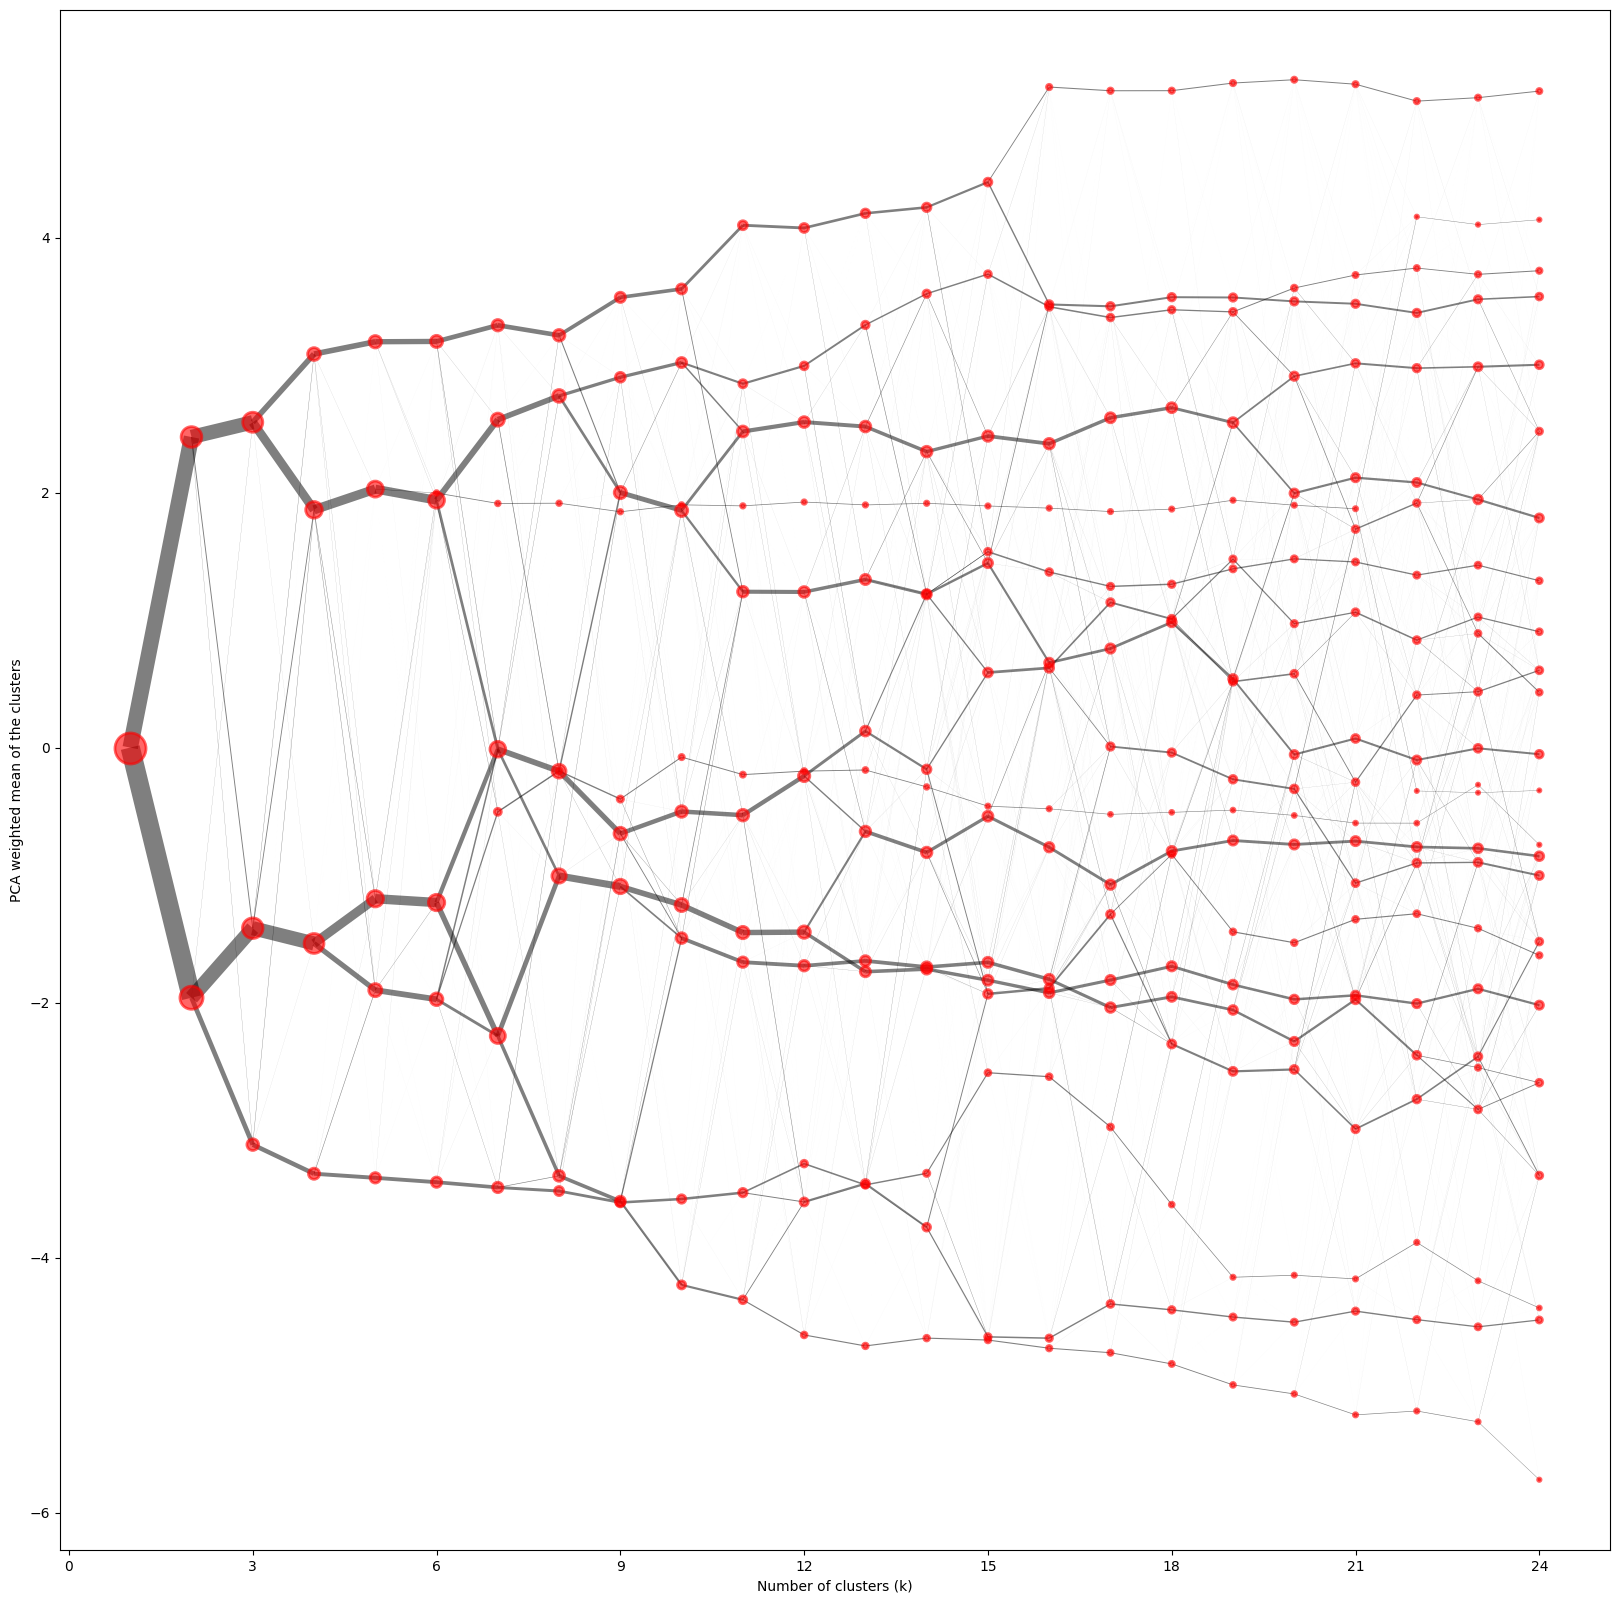

In [28]:
ax = cgram.plot(figsize=(20, 20), linewidth=0.5, cluster_style={"edgecolor": "r", "alpha":.6}, size=1,
       line_style={"alpha":.5})
# ax.set_ylim(-10, 40)

In [29]:
cgram.labels.head()

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
0,0,0,2,0,0,5,0,0,3,2,...,12,7,16,12,2,6,5,13,17,8
1,0,0,2,0,0,1,4,7,6,2,...,4,7,0,12,2,6,5,13,20,9
2,0,1,0,3,4,4,4,7,7,5,...,10,13,4,16,11,9,15,10,7,15
3,0,1,0,3,4,4,4,7,7,5,...,10,13,4,16,11,9,15,10,7,15
4,0,1,2,0,0,1,4,7,5,2,...,12,11,0,11,18,6,9,13,20,9


/usr/local/lib/python3.8/dist-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


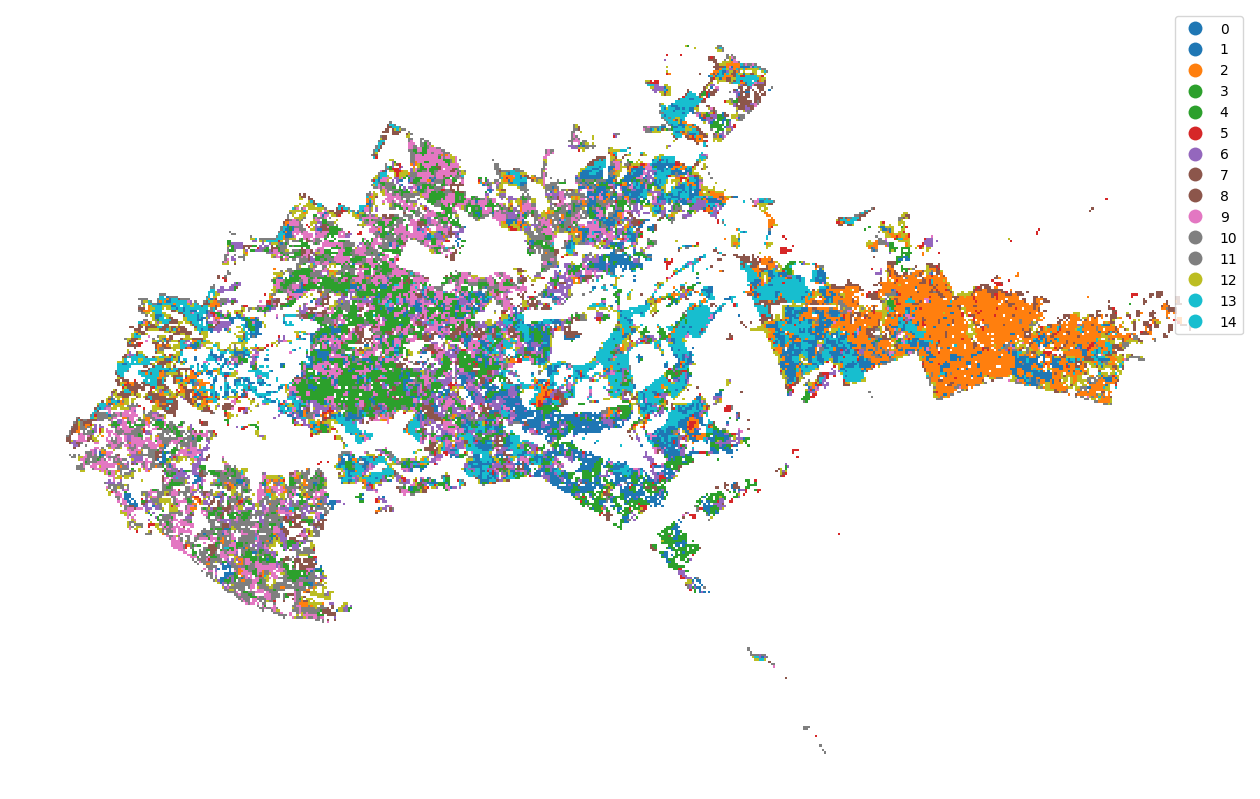

In [30]:
gdf["cluster"] = cgram.labels[15].values
# urban_types = buildings[["geometry", "uID"]].merge(merged[["uID", "cluster"]], on="uID")
gdf.plot("cluster", categorical=True, figsize=(16, 16), legend=True).set_axis_off()

/usr/local/lib/python3.8/dist-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


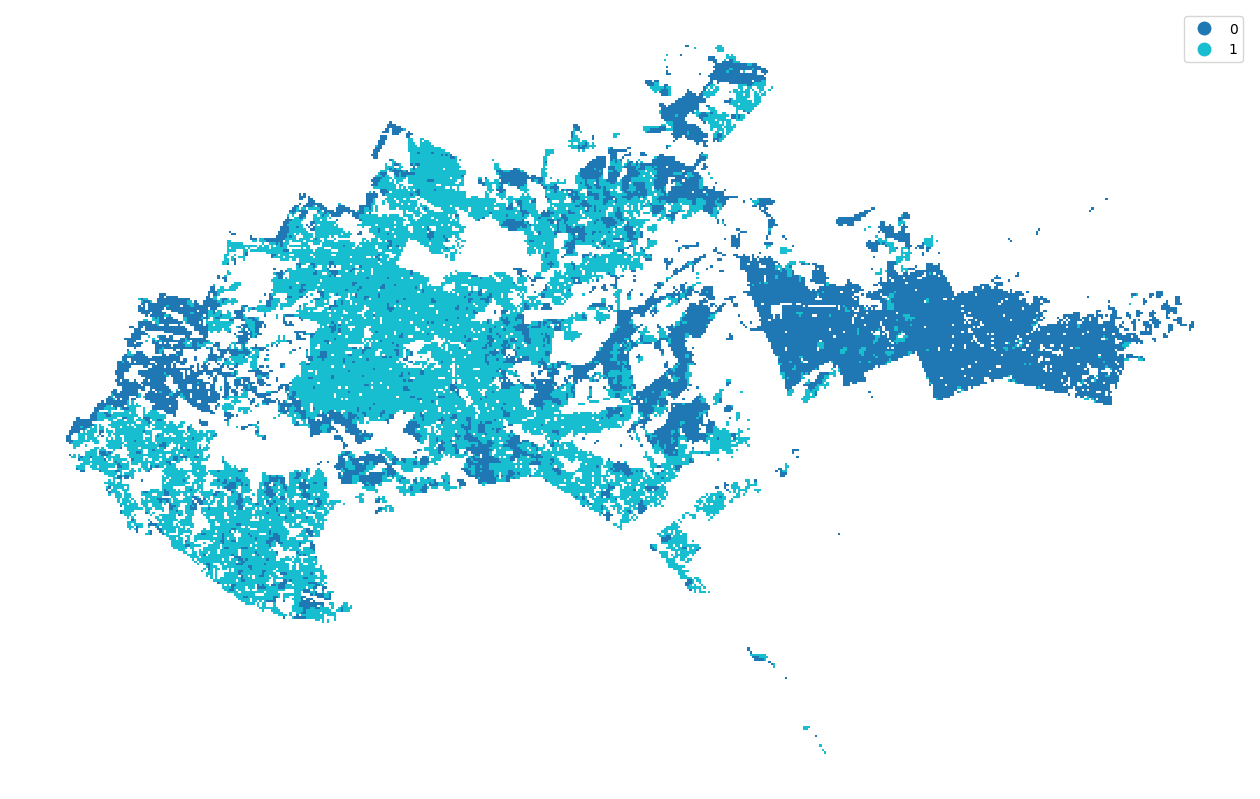

In [67]:
gdf["cluster"] = cgram.labels[2].values
# urban_types = buildings[["geometry", "uID"]].merge(merged[["uID", "cluster"]], on="uID")
gdf.plot("cluster", categorical=True, figsize=(16, 16), legend=True).set_axis_off()

In [68]:
gdf.head()

,ORIG_FID,geometry,cluster,1,2,3,4,5,6,7,...,16,17,18,19,20,21,22,23,24,clusters_2
0,41,"POLYGON ((266983.509 9871665.525, 266883.509 9...",0,0,0,2,0,0,5,0,...,7,16,12,2,6,5,13,17,8,0
1,42,"POLYGON ((267083.509 9871665.525, 266983.509 9...",0,0,0,2,0,0,1,4,...,7,0,12,2,6,5,13,20,9,0
2,55,"POLYGON ((268383.509 9871665.525, 268283.509 9...",1,0,1,0,3,4,4,4,...,13,4,16,11,9,15,10,7,15,1
3,56,"POLYGON ((268483.509 9871665.525, 268383.509 9...",1,0,1,0,3,4,4,4,...,13,4,16,11,9,15,10,7,15,1
4,72,"POLYGON ((267383.509 9871565.525, 267283.509 9...",1,0,1,2,0,0,1,4,...,11,0,11,18,6,9,13,20,9,1


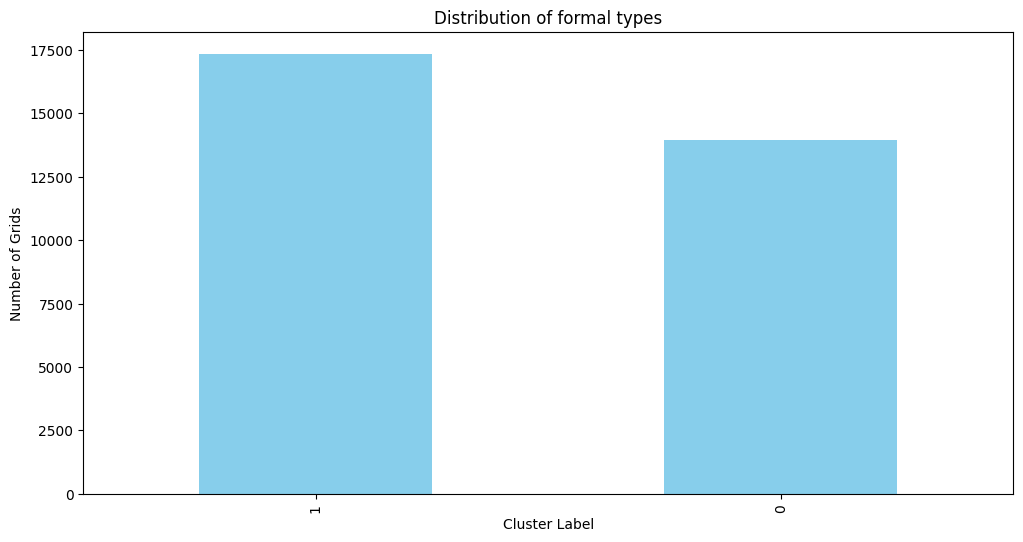

In [69]:
# Count the number of grids for each unique value in the 'NAME_2' column
counts_per_cluster = gdf['cluster'].value_counts()

# Create a bar chart for the distribution
counts_per_cluster.plot(kind='bar', color='skyblue', figsize=(12, 6))

# Add labels and title
plt.xlabel('Cluster Label')
plt.ylabel('Number of Grids')
plt.title('Distribution of formal types')

# Show the bar chart
plt.show()

<AxesSubplot: >

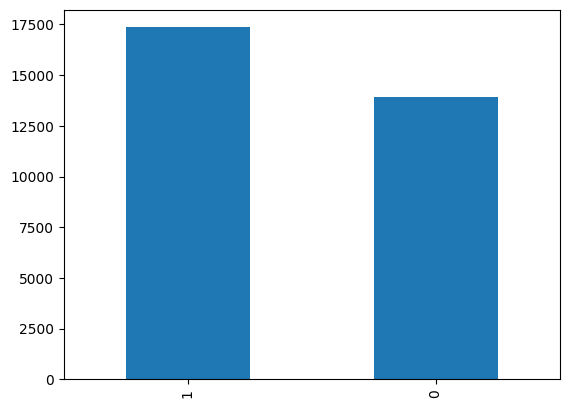

In [71]:
gdf.clusters_2.value_counts().plot.bar()

<AxesSubplot: >

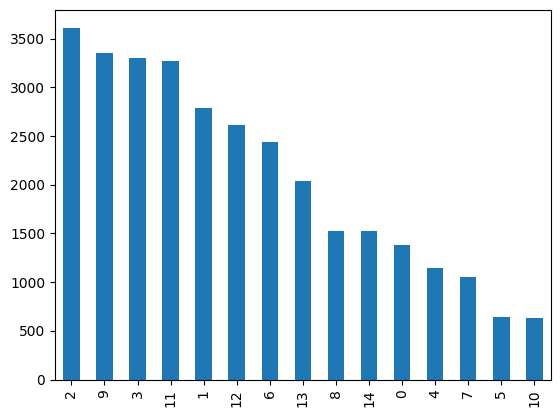

In [33]:
# gdf.cluster.value_counts().plot.bar()

In [34]:
for i in range(1, 25):
    
    gdf[i] = pd.Series(cgram.labels[i].values, index=df.index)

/usr/local/lib/python3.8/dist-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.8/dist-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.8/dist-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [35]:
gdf

,ORIG_FID,geometry,cluster,1,2,3,4,5,6,7,...,15,16,17,18,19,20,21,22,23,24
0,41,"POLYGON ((266983.509 9871665.525, 266883.509 9...",12,0,0,2,0,0,5,0,...,12,7,16,12,2,6,5,13,17,8
1,42,"POLYGON ((267083.509 9871665.525, 266983.509 9...",4,0,0,2,0,0,1,4,...,4,7,0,12,2,6,5,13,20,9
2,55,"POLYGON ((268383.509 9871665.525, 268283.509 9...",10,0,1,0,3,4,4,4,...,10,13,4,16,11,9,15,10,7,15
3,56,"POLYGON ((268483.509 9871665.525, 268383.509 9...",10,0,1,0,3,4,4,4,...,10,13,4,16,11,9,15,10,7,15
4,72,"POLYGON ((267383.509 9871565.525, 267283.509 9...",12,0,1,2,0,0,1,4,...,12,11,0,11,18,6,9,13,20,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31289,71667,"POLYGON ((272183.509 9842265.525, 272083.509 9...",10,0,1,2,1,1,3,4,...,10,13,4,16,11,9,15,10,7,15
31290,71779,"POLYGON ((272583.509 9841965.525, 272483.509 9...",5,0,0,1,2,0,5,0,...,5,15,7,13,6,7,12,9,14,6
31291,71877,"POLYGON ((272783.509 9841565.525, 272683.509 9...",10,0,1,0,3,4,4,4,...,10,13,4,16,11,9,15,10,7,15
31292,71905,"POLYGON ((272883.509 9841365.525, 272783.509 9...",10,0,1,0,3,4,4,4,...,10,13,4,16,11,9,15,10,7,15


<AxesSubplot: >

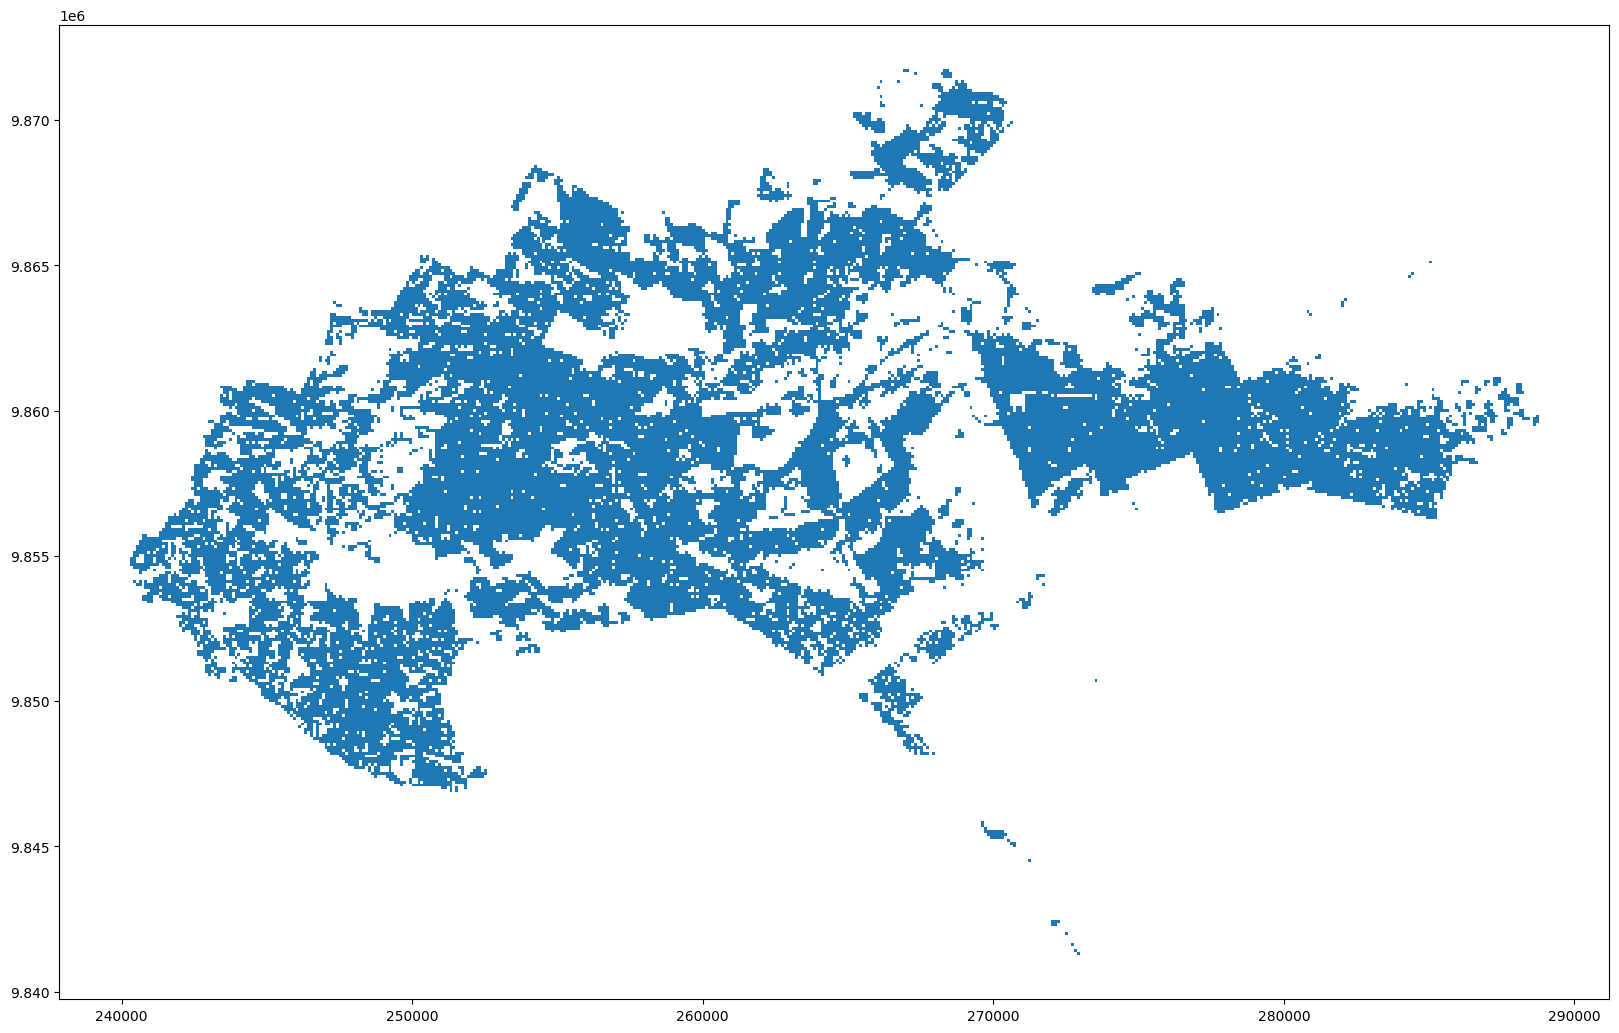

In [36]:
gdf.plot(figsize=(20, 20))

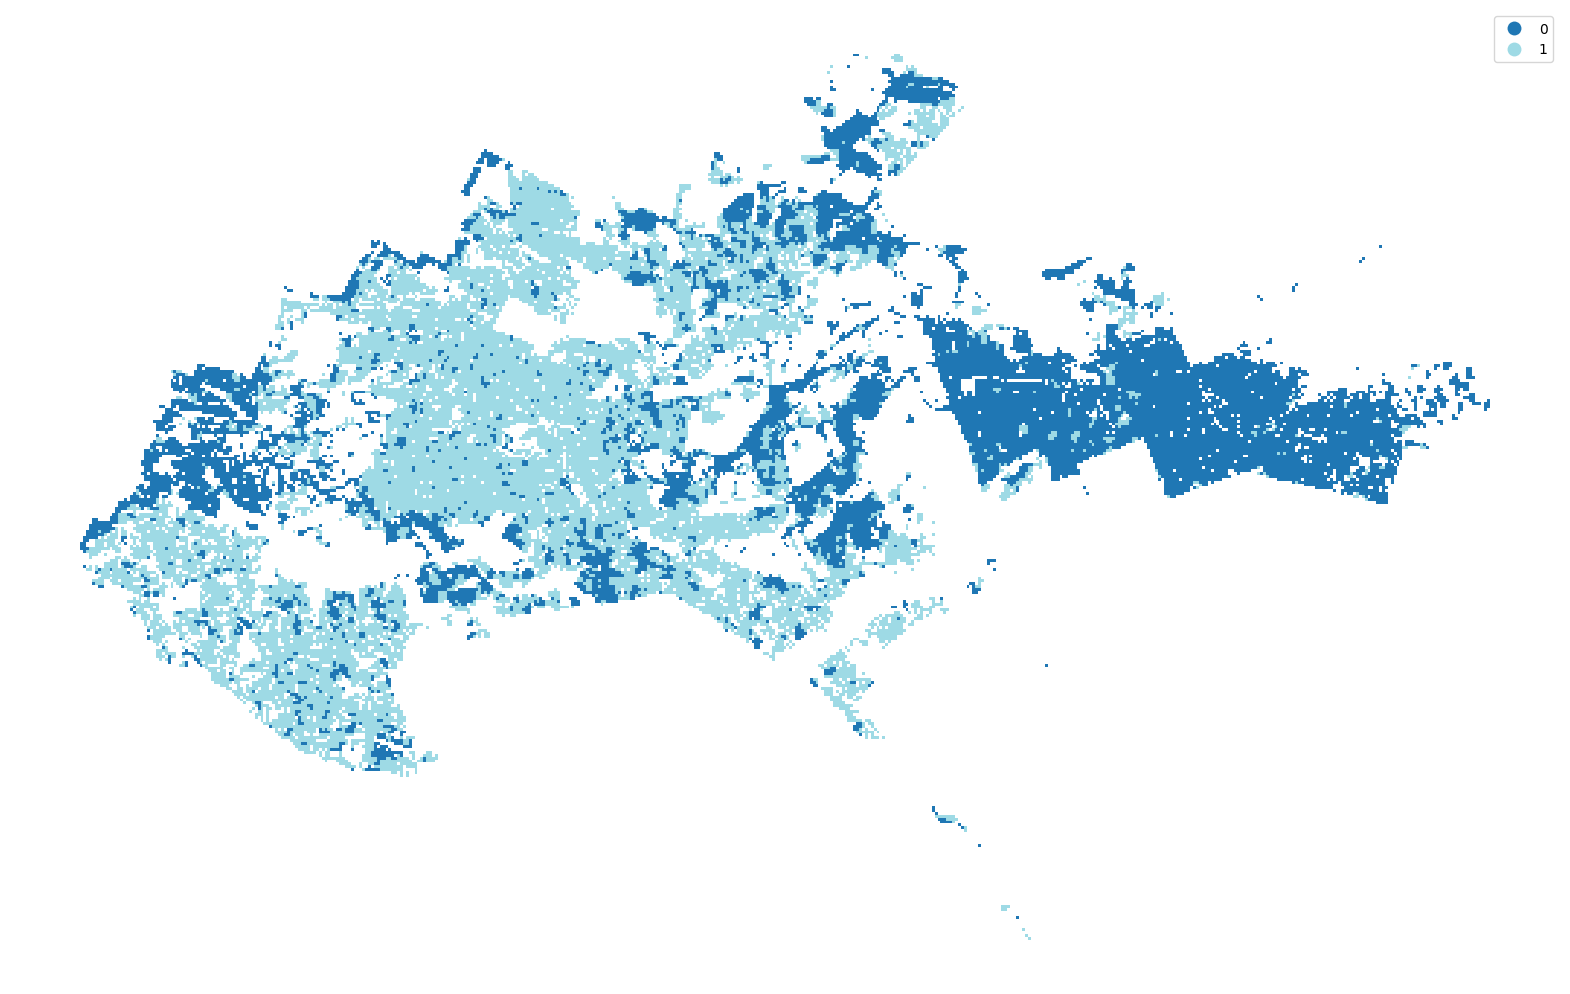

In [41]:
ax = gdf.plot(2, categorical=True, legend=True, figsize=(20, 20), cmap='tab20')
ax.set_axis_off()

/usr/local/lib/python3.8/dist-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


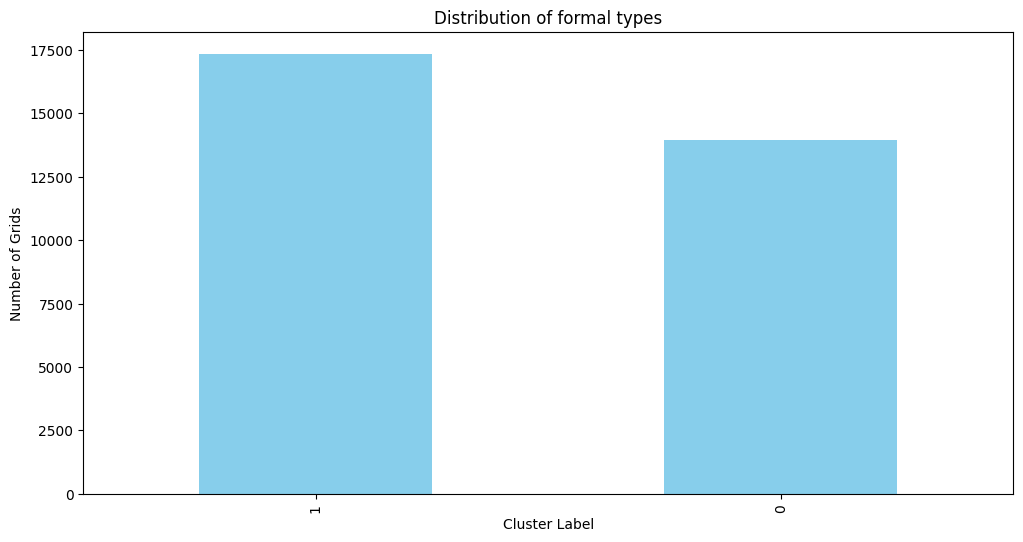

In [82]:
gdf["cluster"] = cgram.labels[2].values
# urban_types = buildings[["geometry", "uID"]].merge(merged[["uID", "cluster"]], on="uID")
# gdf.plot("cluster", categorical=True, figsize=(16, 16), legend=True).set_axis_off()

# Count the number of grids for each unique value in the 'NAME_2' column
counts_per_cluster = gdf['cluster'].value_counts()

# Create a bar chart for the distribution
counts_per_cluster.plot(kind='bar', color='skyblue', figsize=(12, 6))

# Add labels and title
plt.xlabel('Cluster Label')
plt.ylabel('Number of Grids')
plt.title('Distribution of formal types')

# Show the bar chart
plt.show()

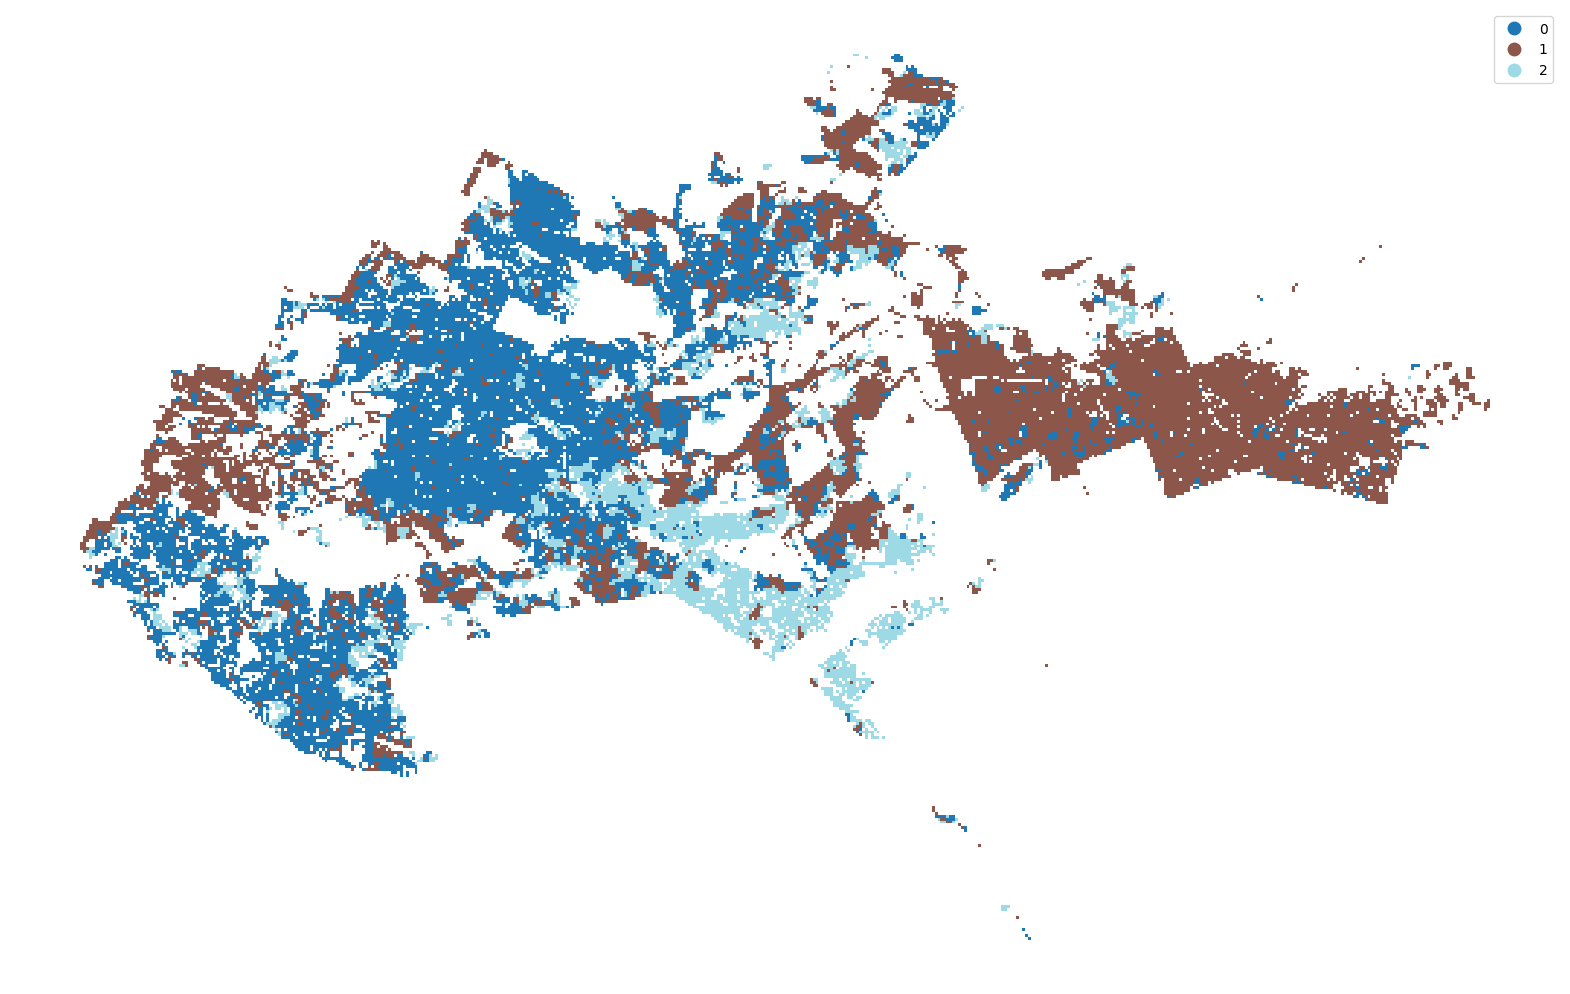

In [40]:
ax = gdf.plot(3, categorical=True, legend=True, figsize=(20, 20), cmap='tab20')
ax.set_axis_off()

/usr/local/lib/python3.8/dist-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


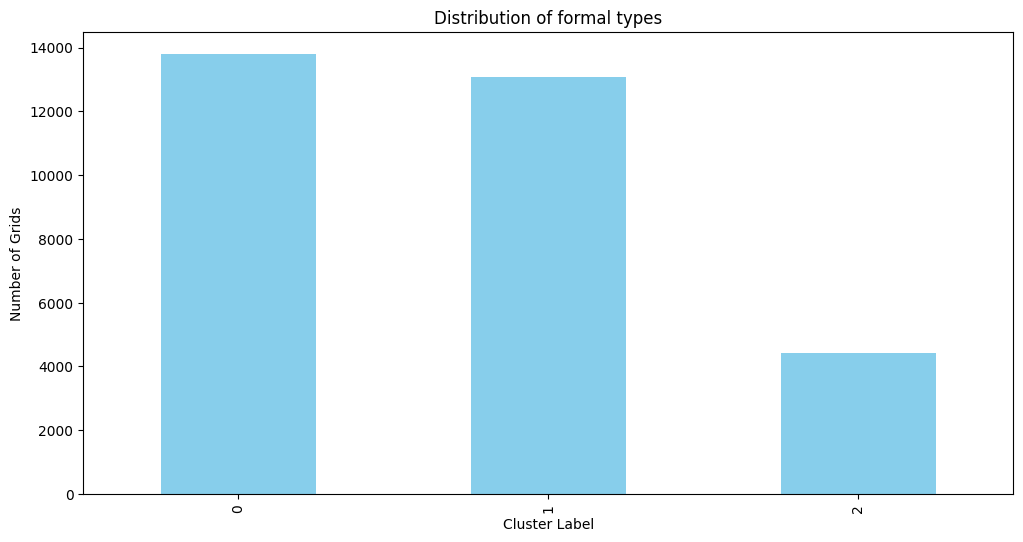

In [81]:
gdf["cluster"] = cgram.labels[3].values
# urban_types = buildings[["geometry", "uID"]].merge(merged[["uID", "cluster"]], on="uID")
# gdf.plot("cluster", categorical=True, figsize=(16, 16), legend=True).set_axis_off()

# Count the number of grids for each unique value in the 'NAME_2' column
counts_per_cluster = gdf['cluster'].value_counts()

# Create a bar chart for the distribution
counts_per_cluster.plot(kind='bar', color='skyblue', figsize=(12, 6))

# Add labels and title
plt.xlabel('Cluster Label')
plt.ylabel('Number of Grids')
plt.title('Distribution of formal types')

# Show the bar chart
plt.show()

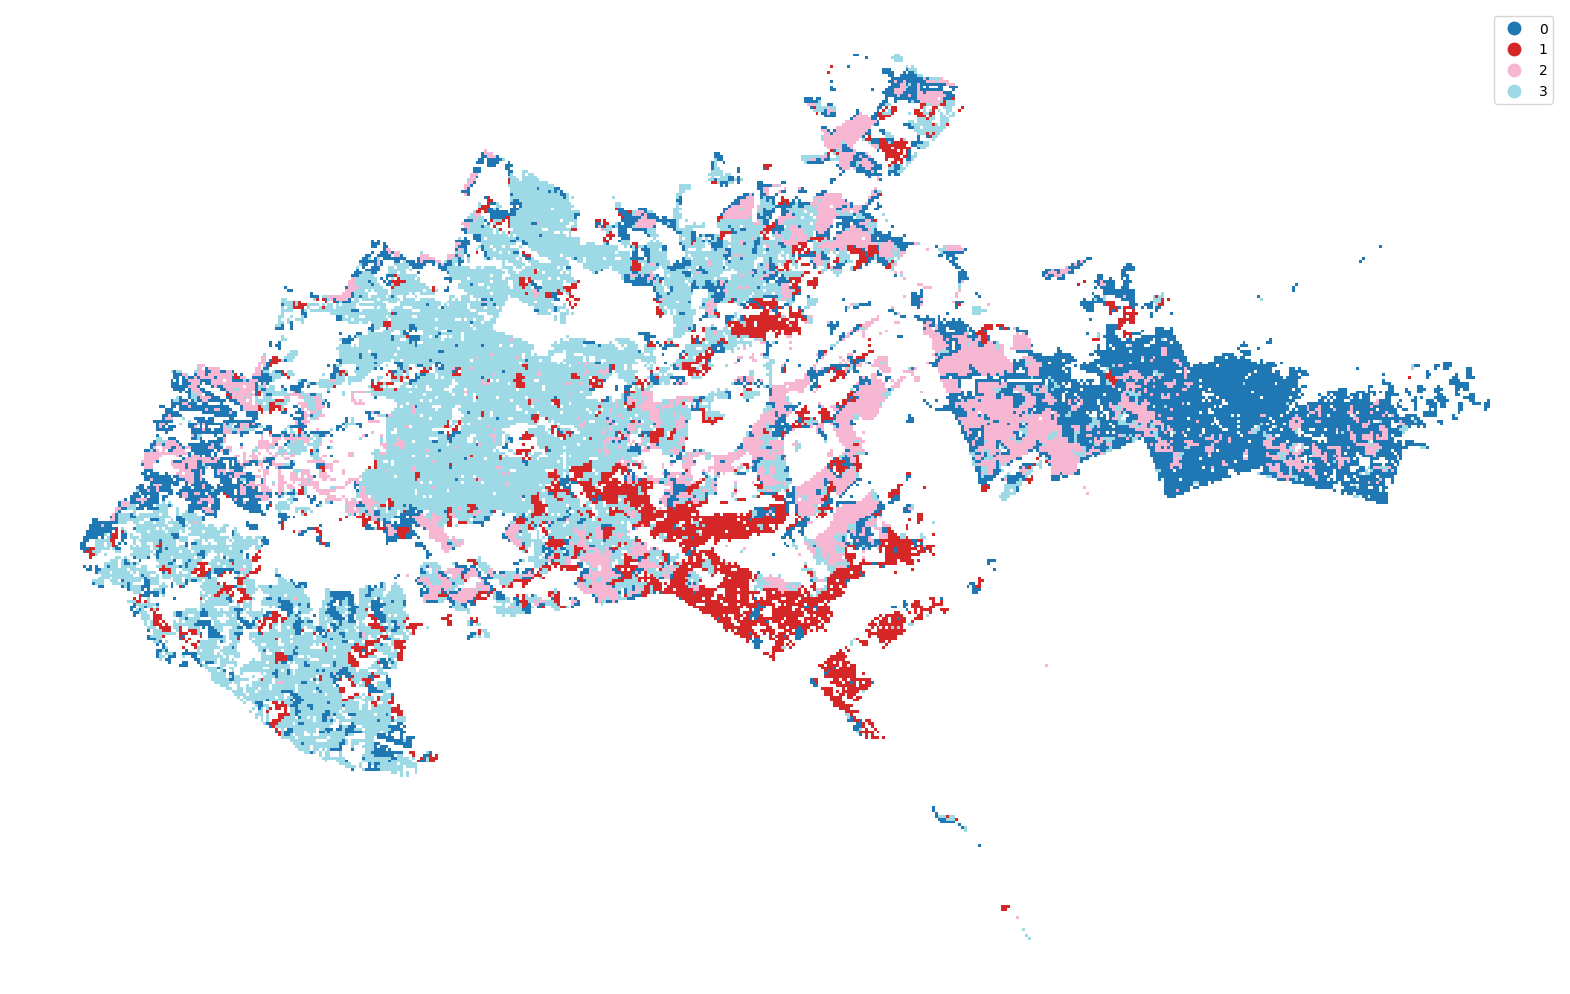

In [42]:
ax = gdf.plot(4, categorical=True, legend=True, figsize=(20, 20), cmap='tab20')
ax.set_axis_off()

/usr/local/lib/python3.8/dist-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


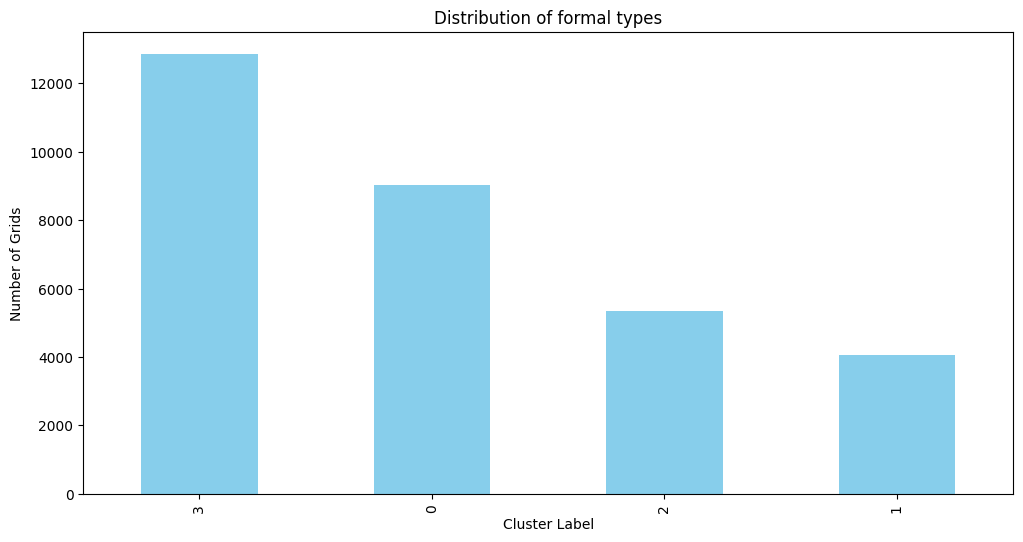

In [80]:
gdf["cluster"] = cgram.labels[4].values
# urban_types = buildings[["geometry", "uID"]].merge(merged[["uID", "cluster"]], on="uID")
# gdf.plot("cluster", categorical=True, figsize=(16, 16), legend=True).set_axis_off()

# Count the number of grids for each unique value in the 'NAME_2' column
counts_per_cluster = gdf['cluster'].value_counts()

# Create a bar chart for the distribution
counts_per_cluster.plot(kind='bar', color='skyblue', figsize=(12, 6))

# Add labels and title
plt.xlabel('Cluster Label')
plt.ylabel('Number of Grids')
plt.title('Distribution of formal types')

# Show the bar chart
plt.show()

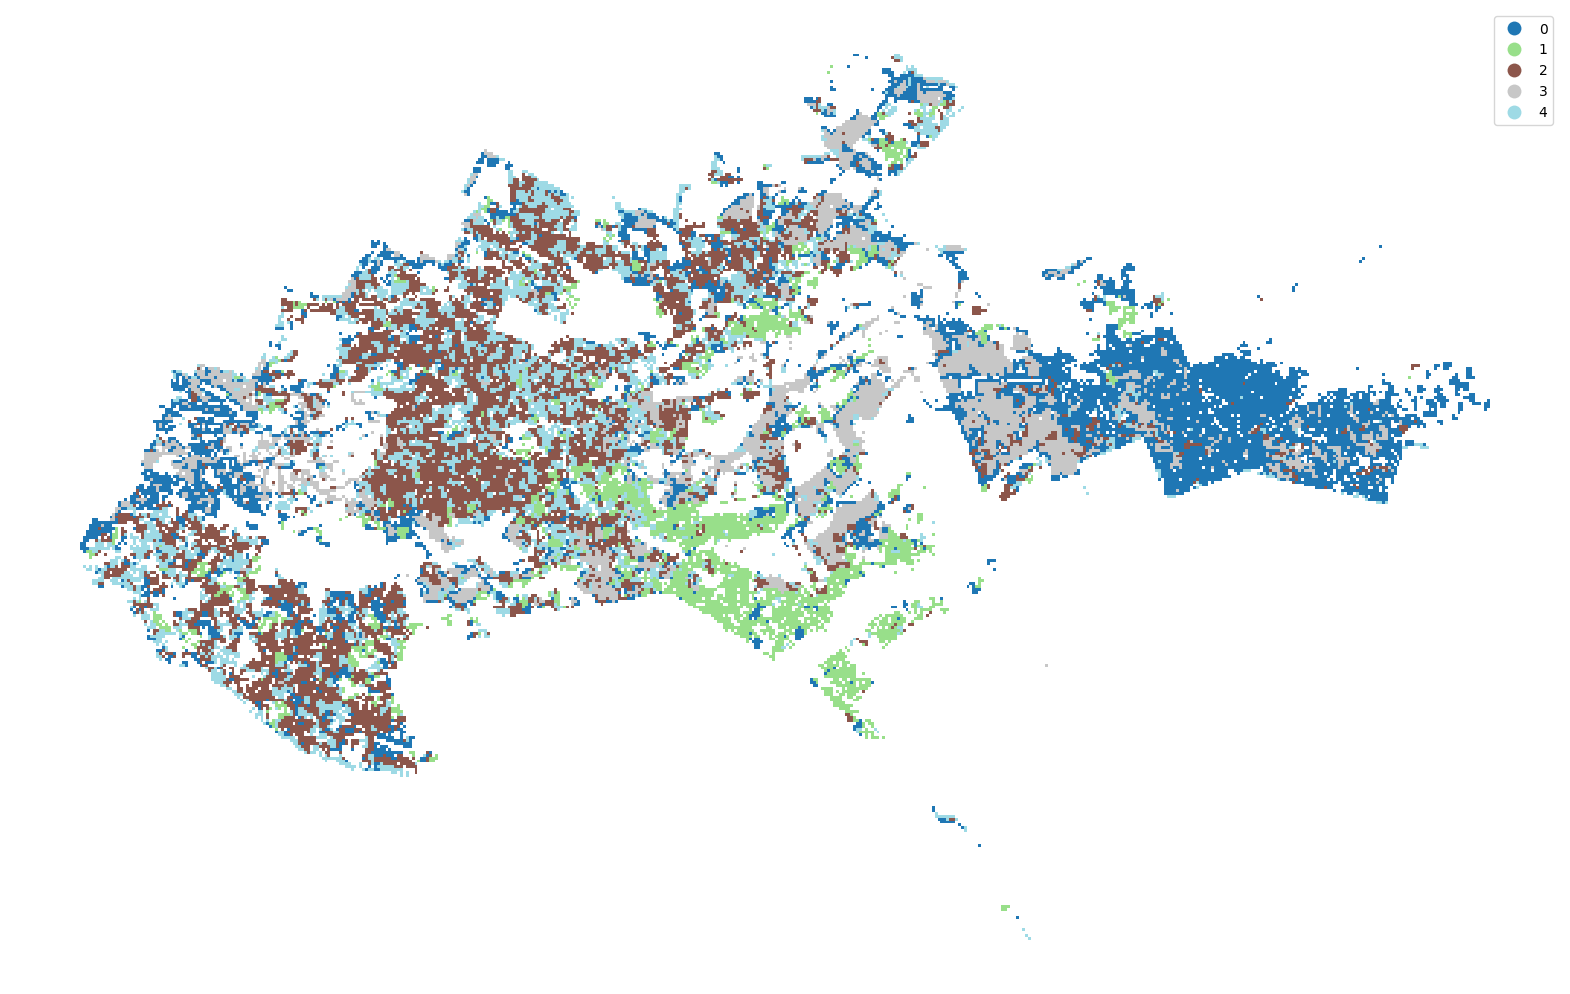

In [43]:
ax = gdf.plot(5, categorical=True, legend=True, figsize=(20, 20), cmap='tab20')
ax.set_axis_off()

/usr/local/lib/python3.8/dist-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


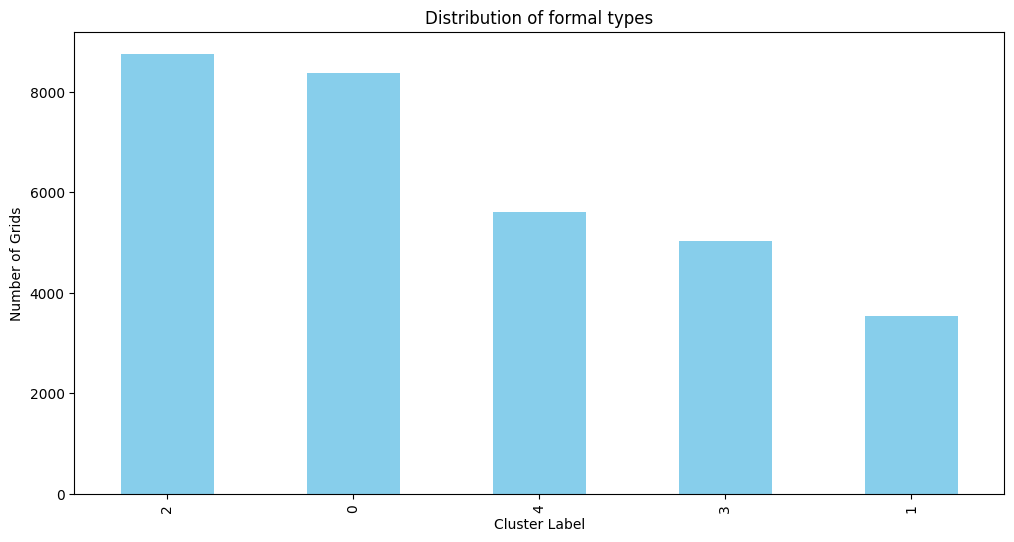

In [79]:
gdf["cluster"] = cgram.labels[5].values
# urban_types = buildings[["geometry", "uID"]].merge(merged[["uID", "cluster"]], on="uID")
# gdf.plot("cluster", categorical=True, figsize=(16, 16), legend=True).set_axis_off()

# Count the number of grids for each unique value in the 'NAME_2' column
counts_per_cluster = gdf['cluster'].value_counts()

# Create a bar chart for the distribution
counts_per_cluster.plot(kind='bar', color='skyblue', figsize=(12, 6))

# Add labels and title
plt.xlabel('Cluster Label')
plt.ylabel('Number of Grids')
plt.title('Distribution of formal types')

# Show the bar chart
plt.show()

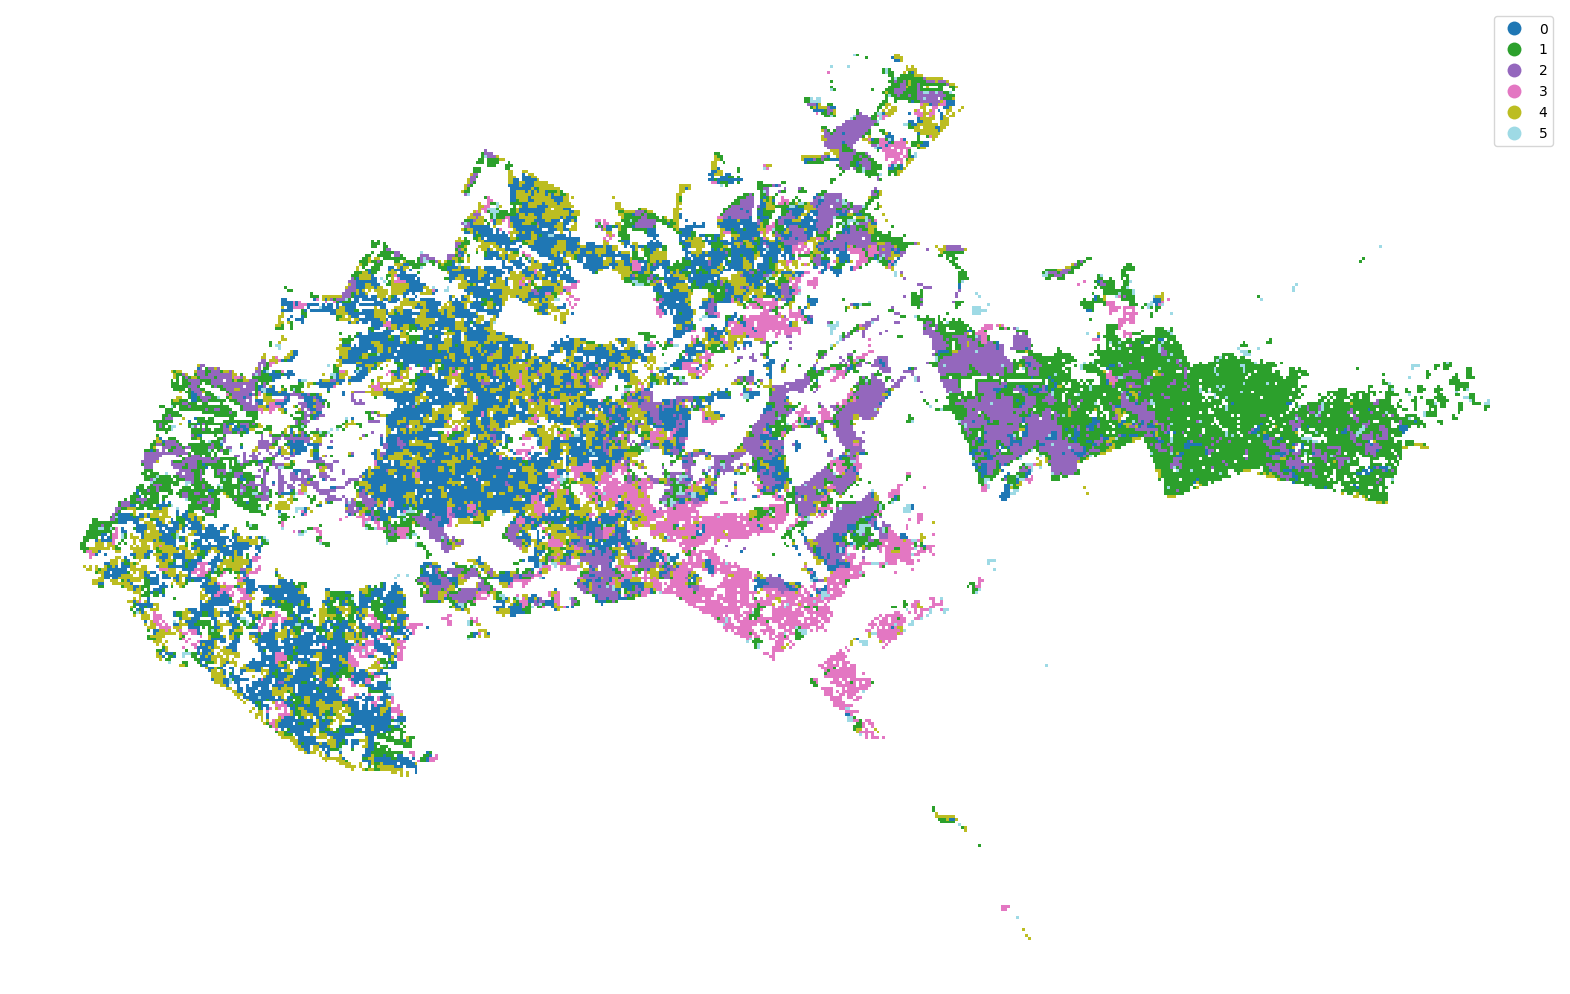

In [65]:
ax = gdf.plot(6, categorical=True, legend=True, figsize=(20, 20), cmap='tab20')
ax.set_axis_off()

/usr/local/lib/python3.8/dist-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


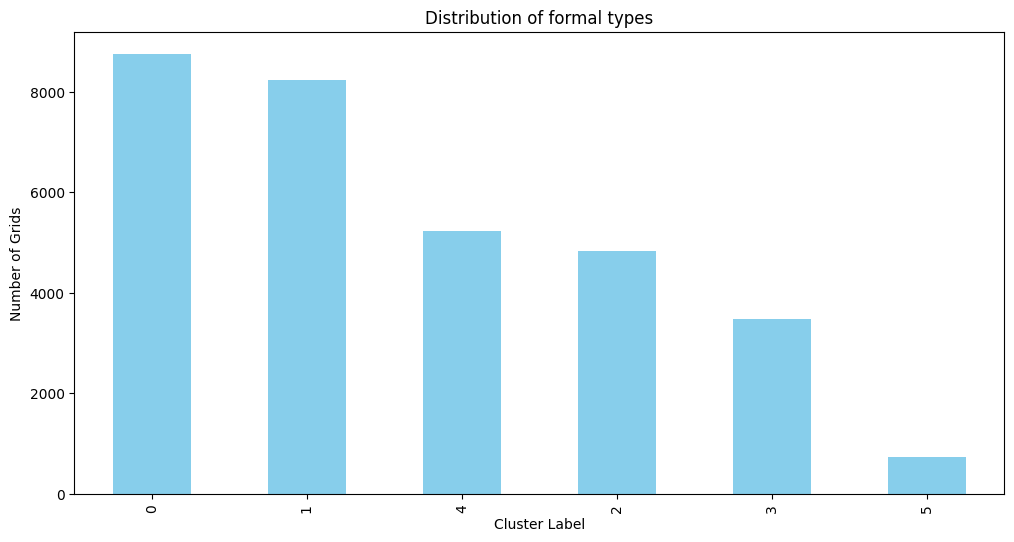

In [78]:
gdf["cluster"] = cgram.labels[6].values
# urban_types = buildings[["geometry", "uID"]].merge(merged[["uID", "cluster"]], on="uID")
# gdf.plot("cluster", categorical=True, figsize=(16, 16), legend=True).set_axis_off()

# Count the number of grids for each unique value in the 'NAME_2' column
counts_per_cluster = gdf['cluster'].value_counts()

# Create a bar chart for the distribution
counts_per_cluster.plot(kind='bar', color='skyblue', figsize=(12, 6))

# Add labels and title
plt.xlabel('Cluster Label')
plt.ylabel('Number of Grids')
plt.title('Distribution of formal types')

# Show the bar chart
plt.show()

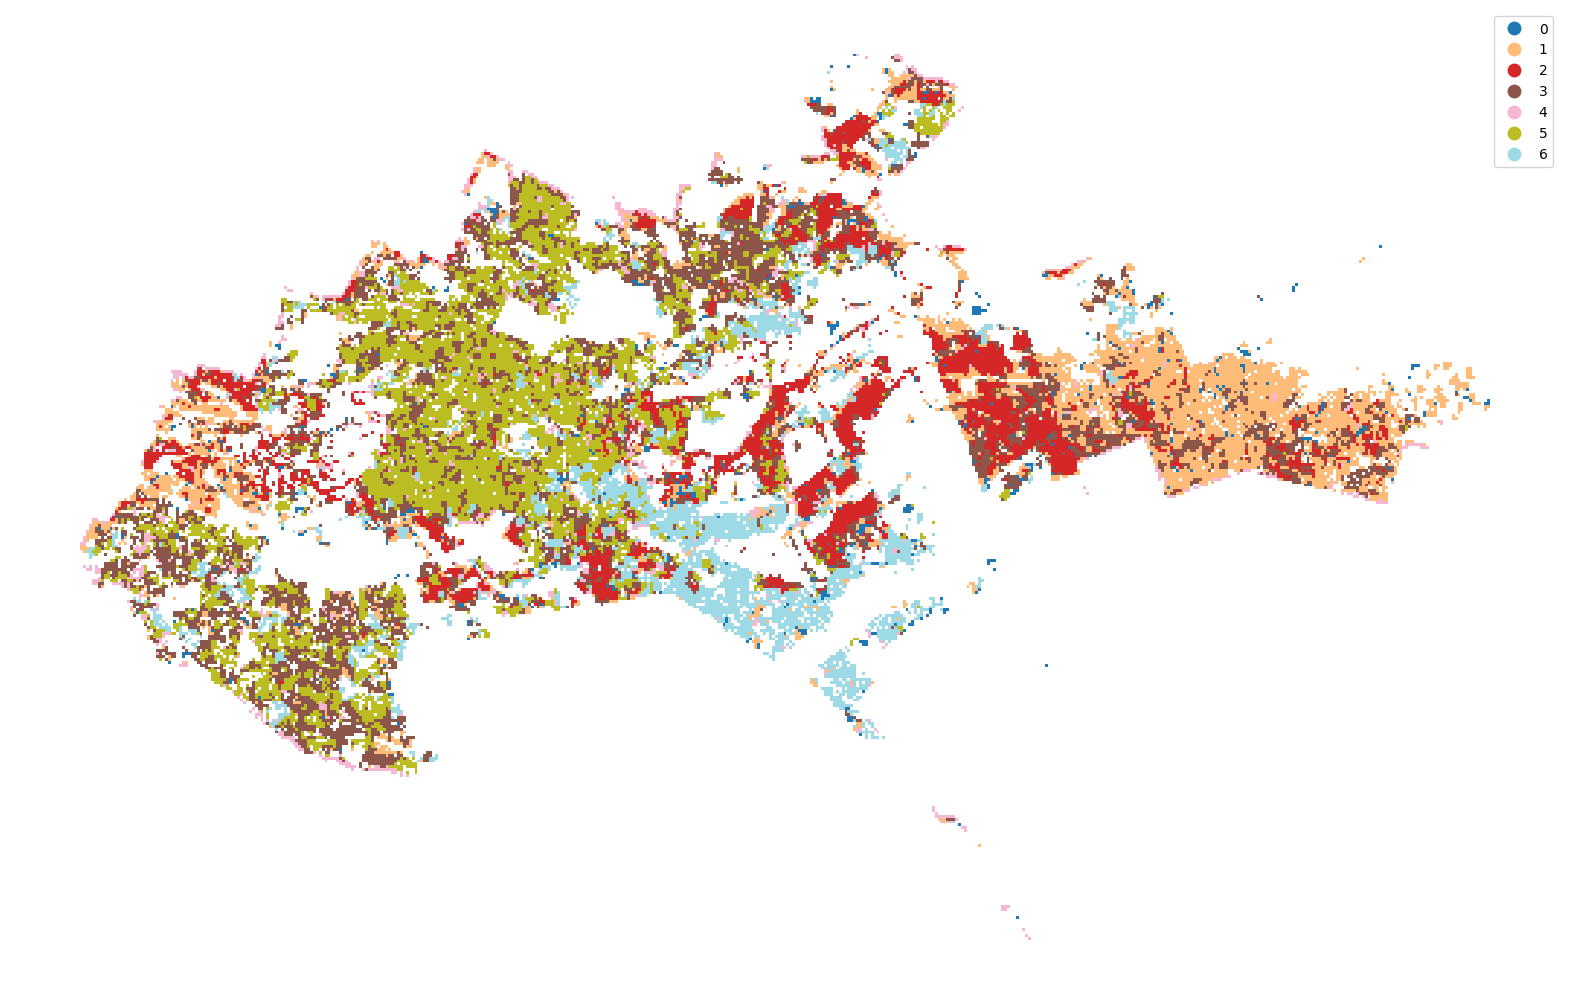

In [66]:
ax = gdf.plot(7, categorical=True, legend=True, figsize=(20, 20), cmap='tab20')
ax.set_axis_off()

/usr/local/lib/python3.8/dist-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


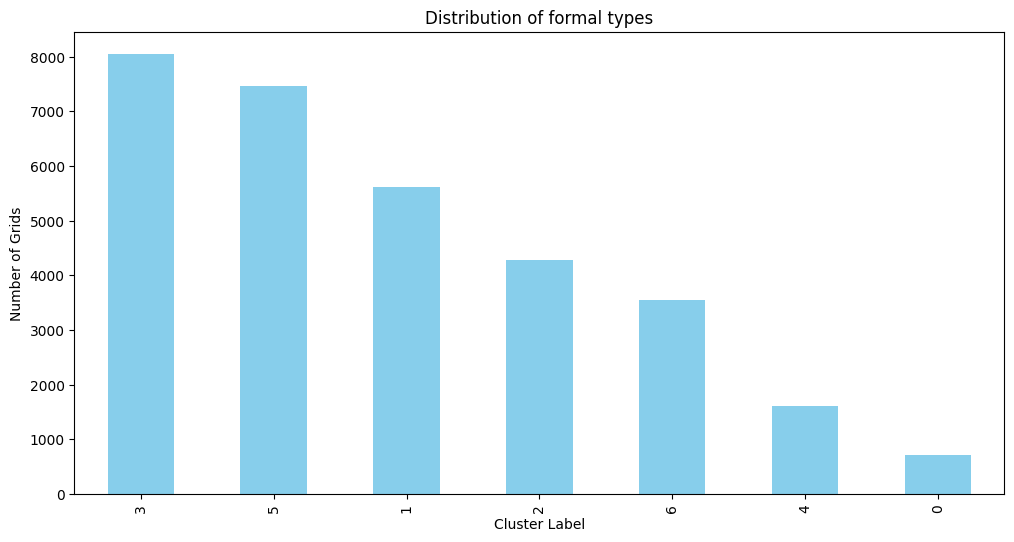

In [77]:
gdf["cluster"] = cgram.labels[7].values
# urban_types = buildings[["geometry", "uID"]].merge(merged[["uID", "cluster"]], on="uID")
# gdf.plot("cluster", categorical=True, figsize=(16, 16), legend=True).set_axis_off()

# Count the number of grids for each unique value in the 'NAME_2' column
counts_per_cluster = gdf['cluster'].value_counts()

# Create a bar chart for the distribution
counts_per_cluster.plot(kind='bar', color='skyblue', figsize=(12, 6))

# Add labels and title
plt.xlabel('Cluster Label')
plt.ylabel('Number of Grids')
plt.title('Distribution of formal types')

# Show the bar chart
plt.show()

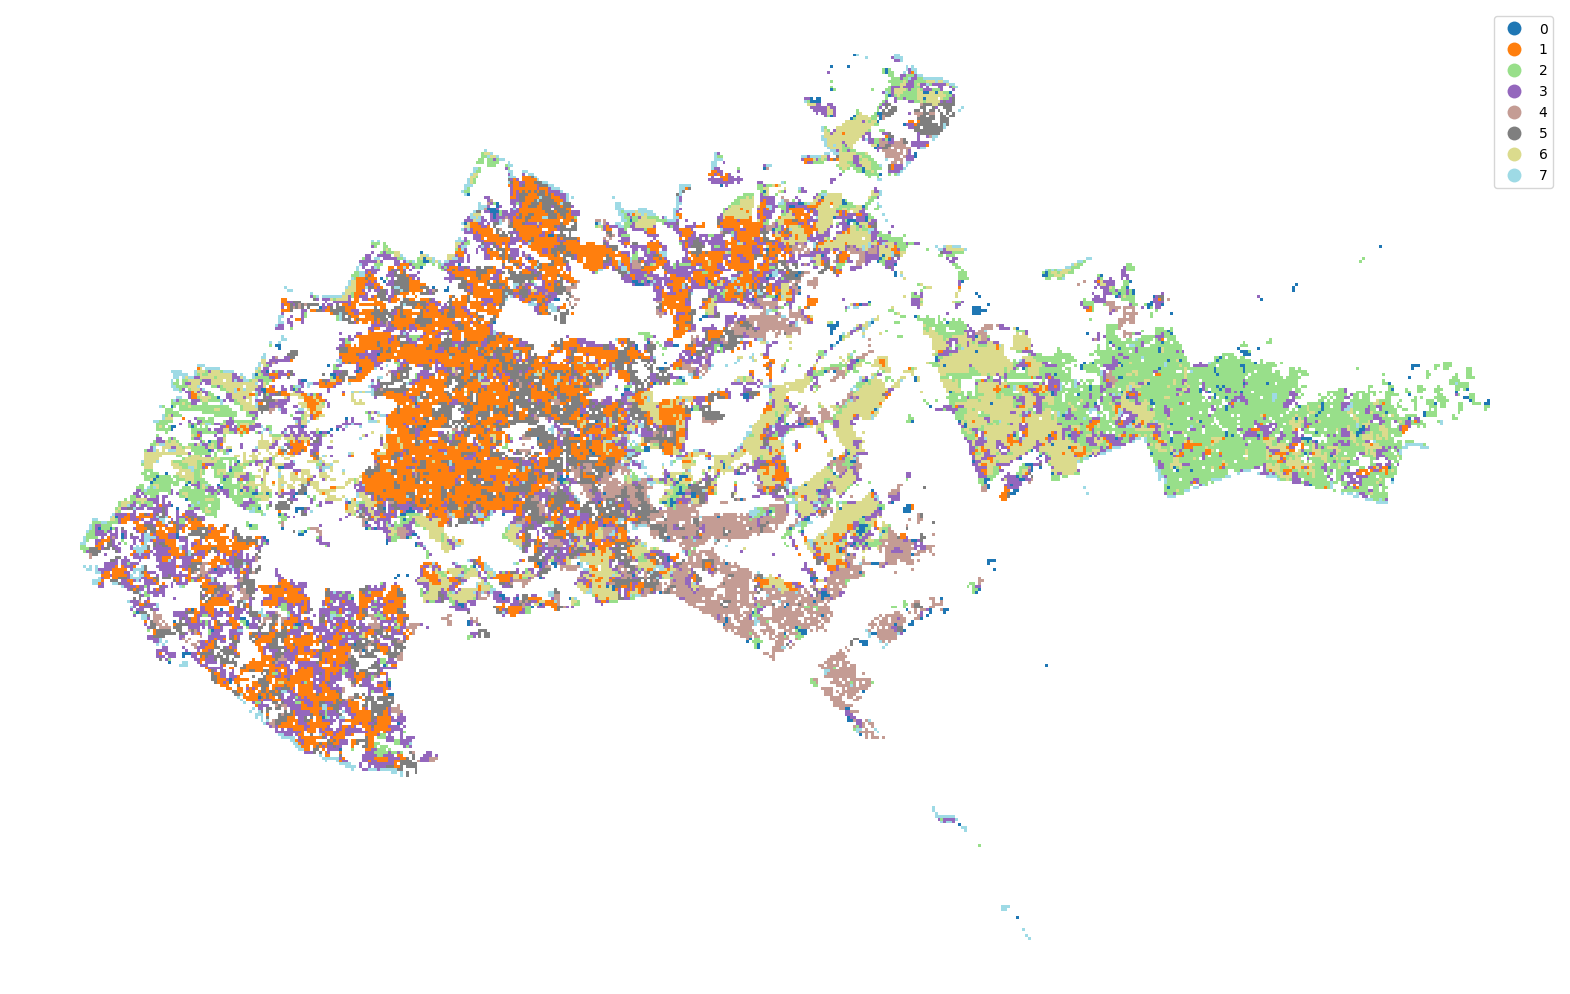

In [72]:
ax = gdf.plot(8, categorical=True, legend=True, figsize=(20, 20), cmap='tab20')
ax.set_axis_off()

/usr/local/lib/python3.8/dist-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


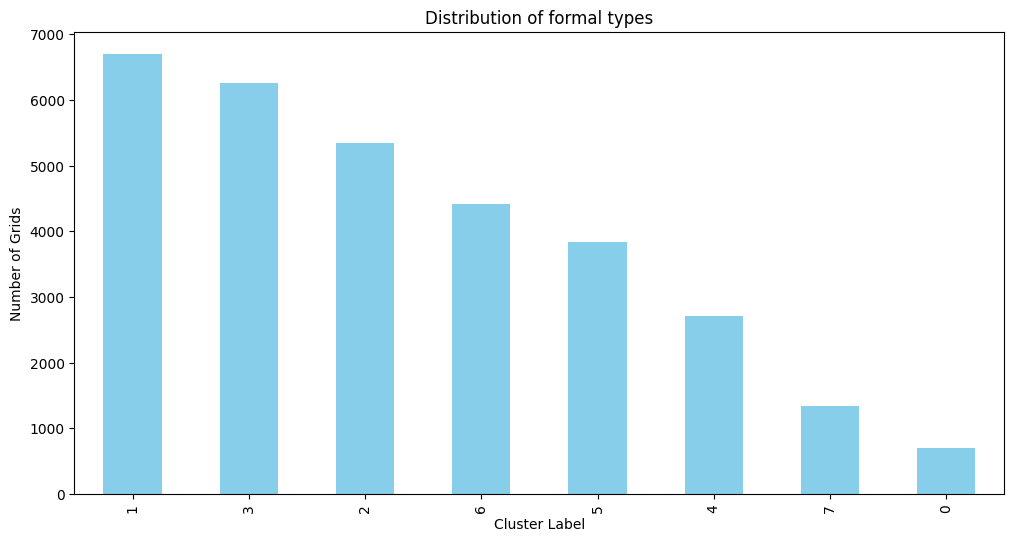

In [76]:
gdf["cluster"] = cgram.labels[8].values
# urban_types = buildings[["geometry", "uID"]].merge(merged[["uID", "cluster"]], on="uID")
# gdf.plot("cluster", categorical=True, figsize=(16, 16), legend=True).set_axis_off()

# Count the number of grids for each unique value in the 'NAME_2' column
counts_per_cluster = gdf['cluster'].value_counts()

# Create a bar chart for the distribution
counts_per_cluster.plot(kind='bar', color='skyblue', figsize=(12, 6))

# Add labels and title
plt.xlabel('Cluster Label')
plt.ylabel('Number of Grids')
plt.title('Distribution of formal types')

# Show the bar chart
plt.show()

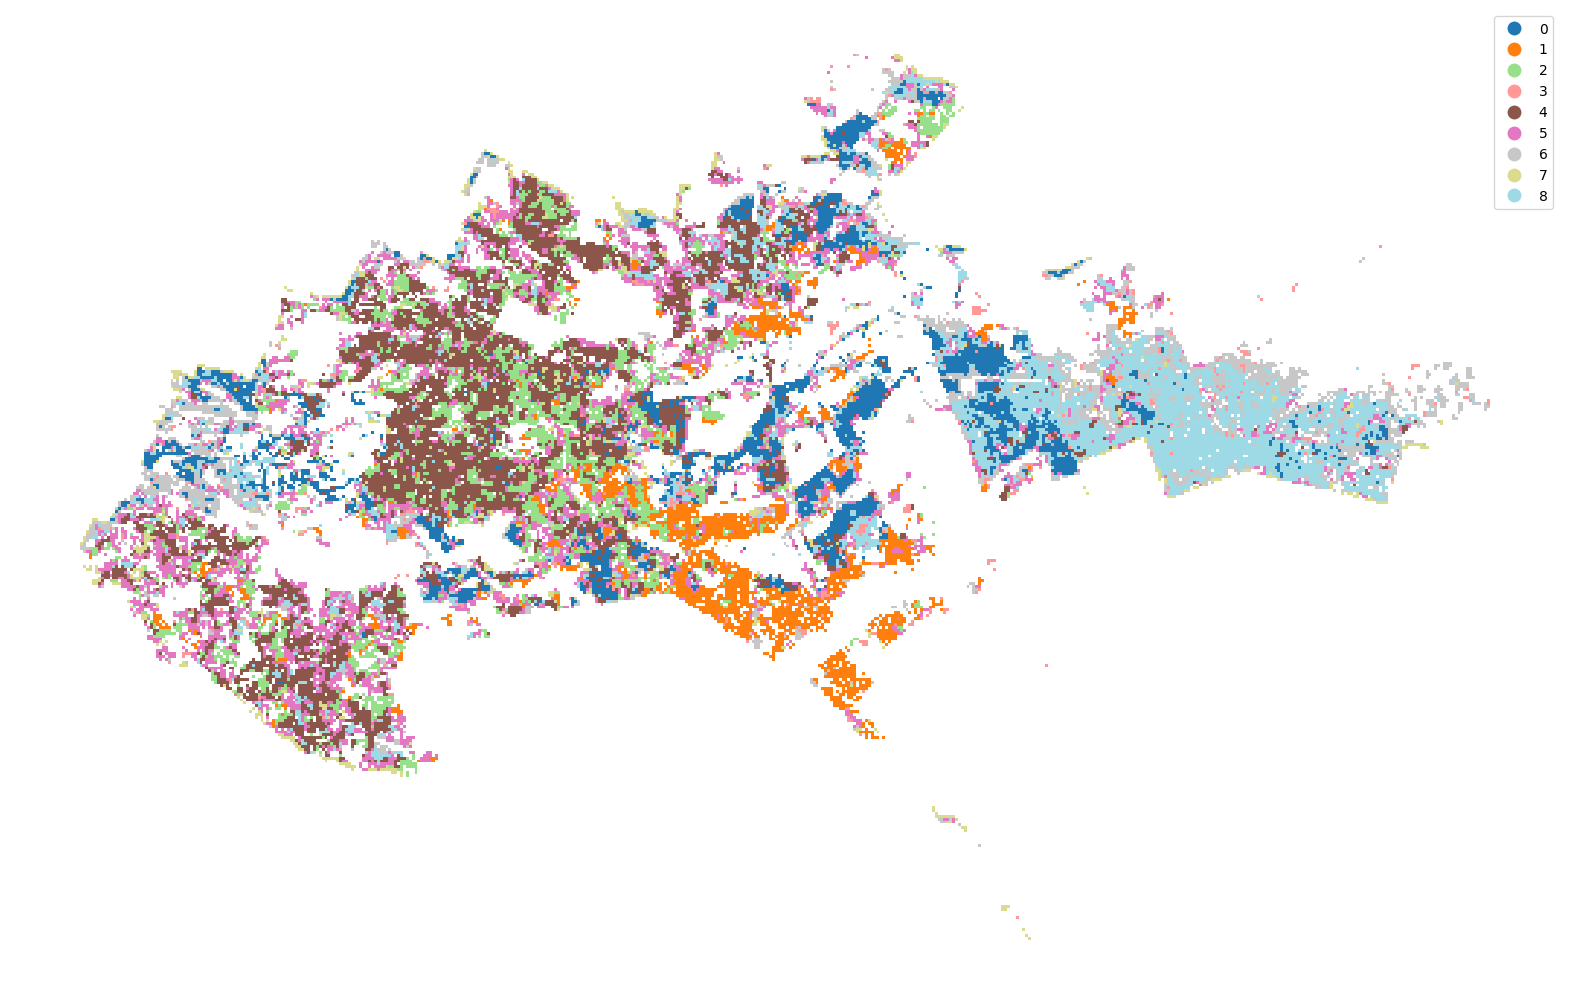

In [73]:
ax = gdf.plot(9, categorical=True, legend=True, figsize=(20, 20), cmap='tab20')
ax.set_axis_off()

/usr/local/lib/python3.8/dist-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


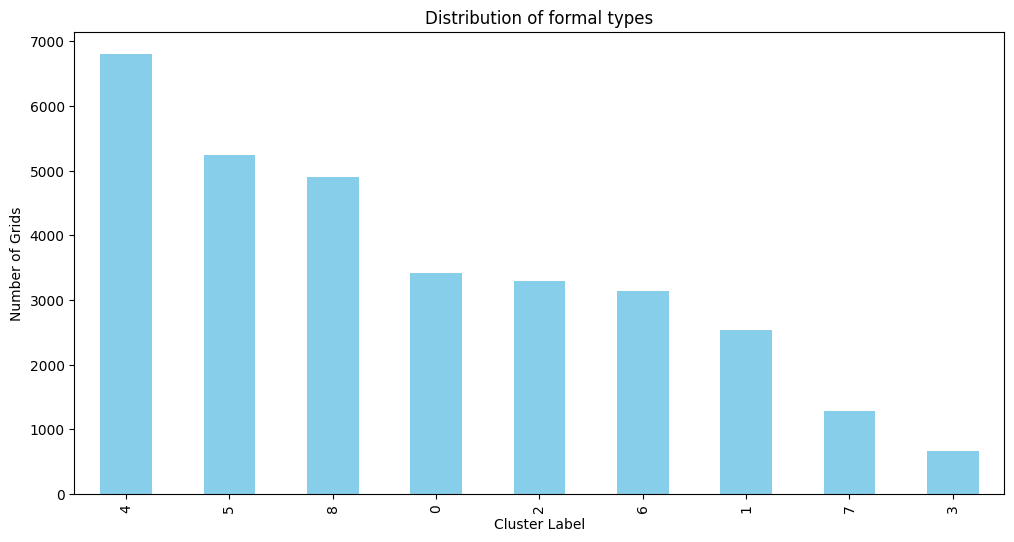

In [75]:
gdf["cluster"] = cgram.labels[9].values
# urban_types = buildings[["geometry", "uID"]].merge(merged[["uID", "cluster"]], on="uID")
# gdf.plot("cluster", categorical=True, figsize=(16, 16), legend=True).set_axis_off()

# Count the number of grids for each unique value in the 'NAME_2' column
counts_per_cluster = gdf['cluster'].value_counts()

# Create a bar chart for the distribution
counts_per_cluster.plot(kind='bar', color='skyblue', figsize=(12, 6))

# Add labels and title
plt.xlabel('Cluster Label')
plt.ylabel('Number of Grids')
plt.title('Distribution of formal types')

# Show the bar chart
plt.show()

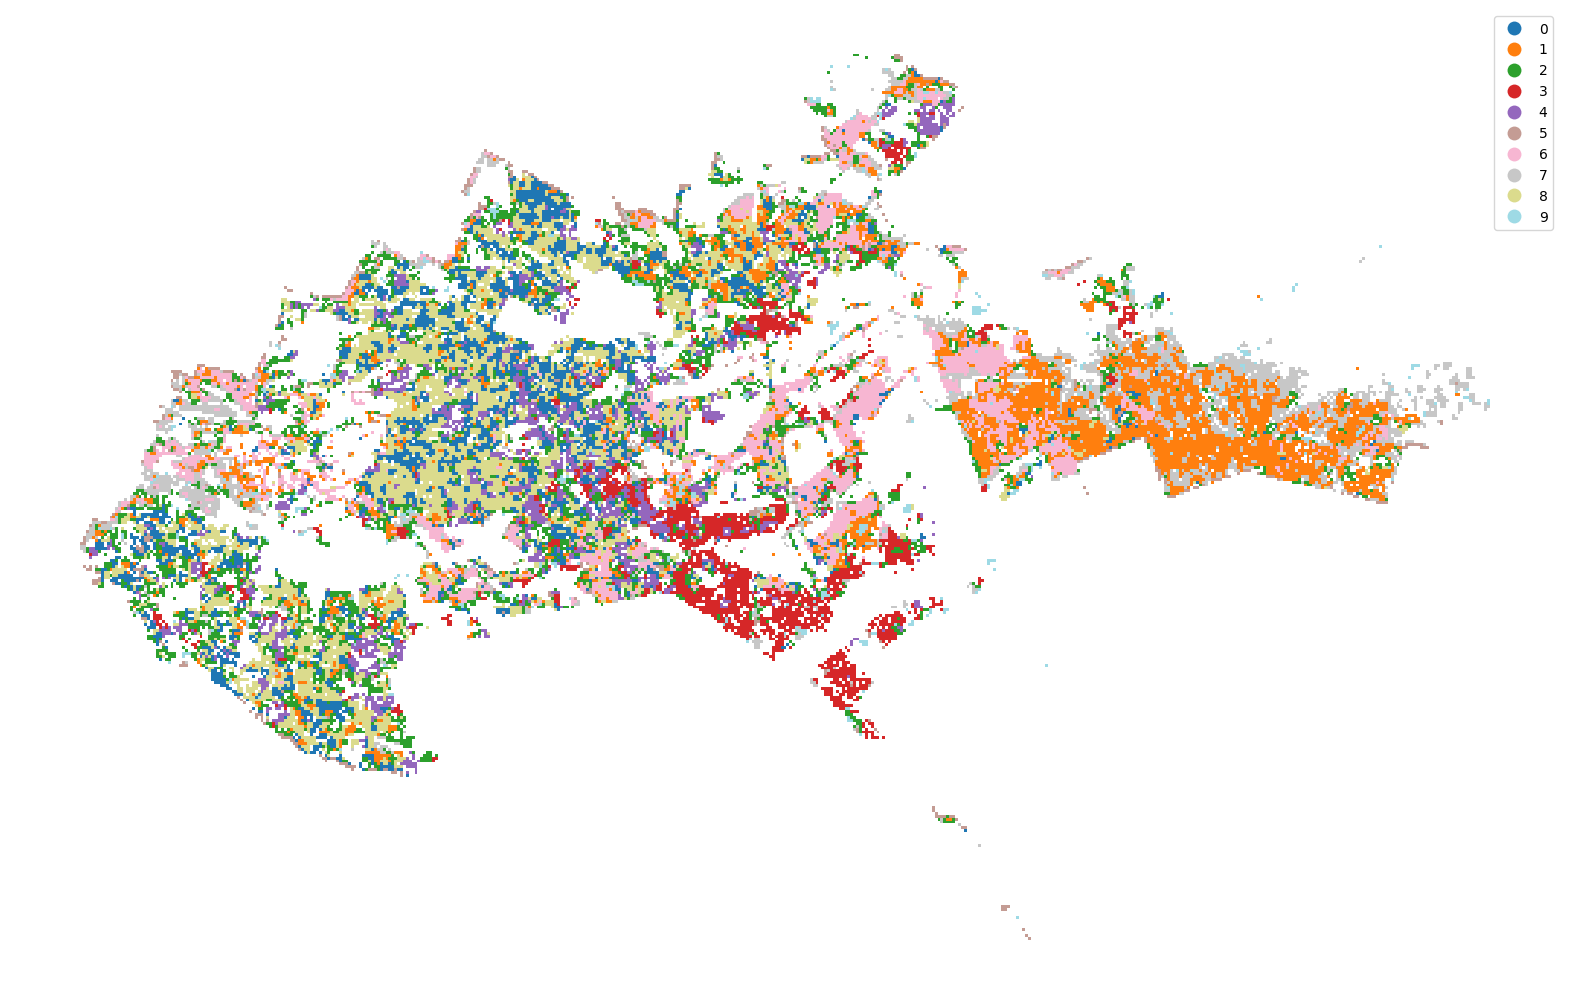

In [44]:
ax = gdf.plot(10, categorical=True, legend=True, figsize=(20, 20), cmap='tab20')
ax.set_axis_off()

/usr/local/lib/python3.8/dist-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


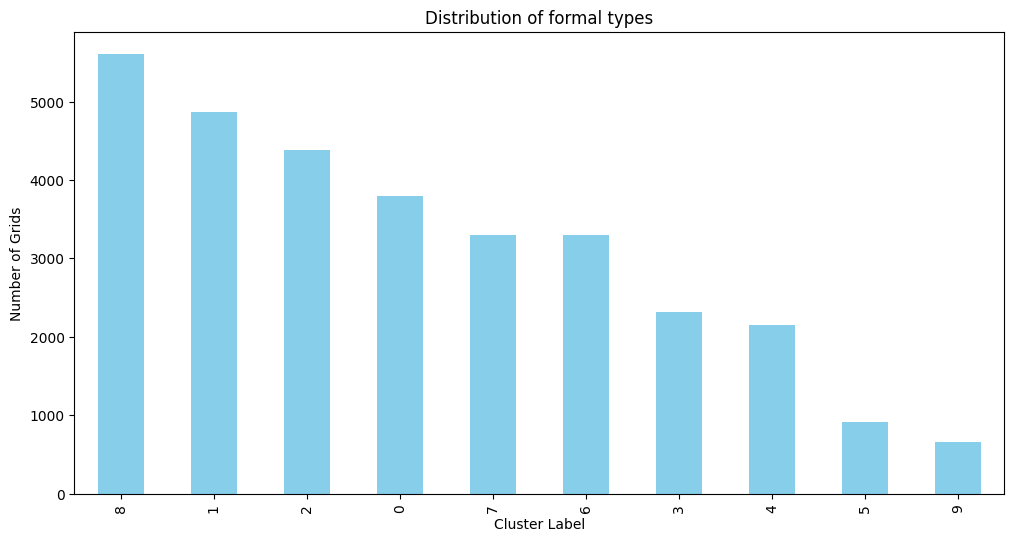

In [74]:
gdf["cluster"] = cgram.labels[10].values
# urban_types = buildings[["geometry", "uID"]].merge(merged[["uID", "cluster"]], on="uID")
# gdf.plot("cluster", categorical=True, figsize=(16, 16), legend=True).set_axis_off()

# Count the number of grids for each unique value in the 'NAME_2' column
counts_per_cluster = gdf['cluster'].value_counts()

# Create a bar chart for the distribution
counts_per_cluster.plot(kind='bar', color='skyblue', figsize=(12, 6))

# Add labels and title
plt.xlabel('Cluster Label')
plt.ylabel('Number of Grids')
plt.title('Distribution of formal types')

# Show the bar chart
plt.show()

<AxesSubplot: >

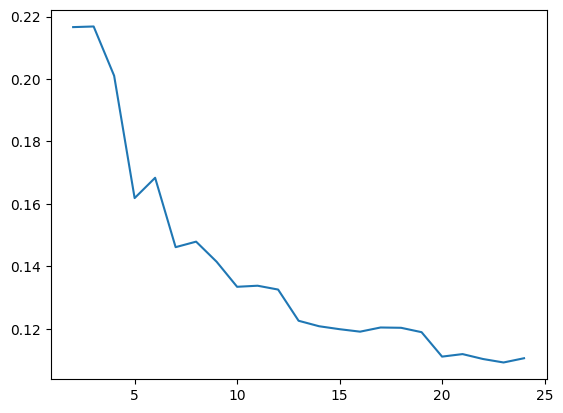

In [46]:
silhouette = cgram.silhouette_score(sample_size=10000)
silhouette.plot()

<AxesSubplot: >

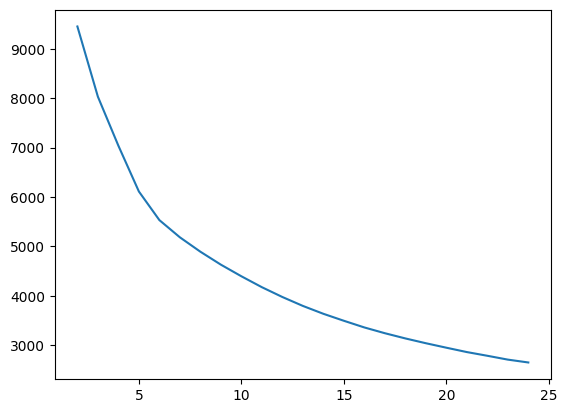

In [47]:
calinski = cgram.calinski_harabasz_score()
calinski.plot()

<AxesSubplot: >

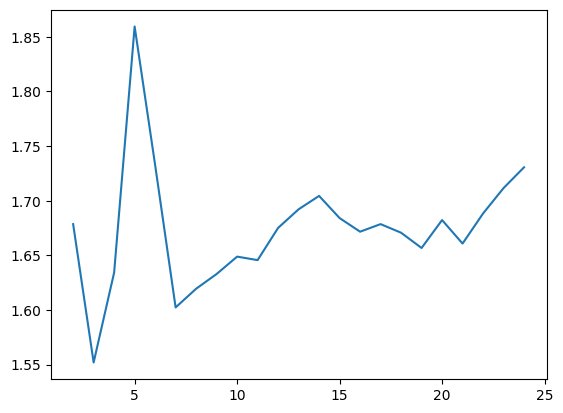

In [48]:
db = cgram.davies_bouldin_score()
db.plot()

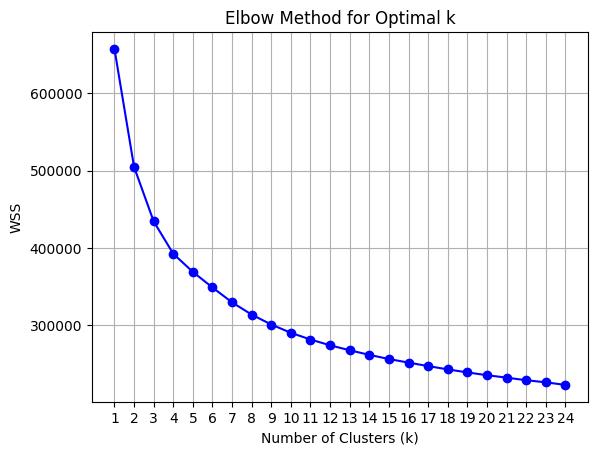

In [49]:
# elbow methof for optiml k
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming 'data' is your dataset

# Initialize an empty list to store the inertia (within-cluster sum of squares) for different values of k
wss = []

# Specify the range of k values to test
k_values = range(1, 25)

# Iterate through each value of k
for k in k_values:
    # Initialize KMeans with the current value of k
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit KMeans to the data
    kmeans.fit(scaled_df)
    
    # Append the inertia to the list
    wss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, wss, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WSS')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)
plt.grid(True)
plt.show()
# plt.savefig('Elbow.png', dpi=300, bbox_inches='tight')

For n_clusters = 1, clustering resulted in only one cluster.
For n_clusters = 2, the silhouette score is 0.21691243328621057
For n_clusters = 3, the silhouette score is 0.21334749625733063
For n_clusters = 4, the silhouette score is 0.20083831481689837
For n_clusters = 5, the silhouette score is 0.1607217762762948
For n_clusters = 6, the silhouette score is 0.1686232195385507
For n_clusters = 7, the silhouette score is 0.14757092734660585
For n_clusters = 8, the silhouette score is 0.14672587338774054
For n_clusters = 9, the silhouette score is 0.13961630414352724
For n_clusters = 10, the silhouette score is 0.13537888399924178
For n_clusters = 11, the silhouette score is 0.13295732887828884
For n_clusters = 12, the silhouette score is 0.13176373184451162
For n_clusters = 13, the silhouette score is 0.12287871199990148
For n_clusters = 14, the silhouette score is 0.12251193290260932
For n_clusters = 15, the silhouette score is 0.12211086891594584
For n_clusters = 16, the silhouette sco

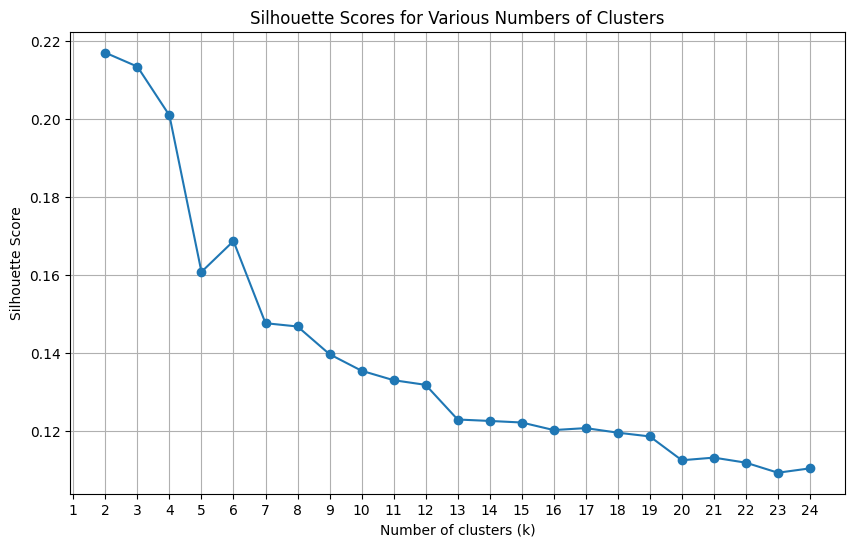

The optimal number of clusters is 2


In [52]:
from sklearn.metrics import silhouette_score
# Define the range of k values to test
k_values = list(range(1, 25))  # For example, testing k from 2 to 10

# List to hold silhouette scores for each k
silhouette_scores = []

# Calculate silhouette score for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    cluster_labels = kmeans.labels_

    # Check if we have at least two clusters
    if len(set(cluster_labels)) > 1:
        silhouette_avg = silhouette_score(scaled_df, cluster_labels)
        silhouette_scores.append(silhouette_avg)
        print(f"For n_clusters = {k}, the silhouette score is {silhouette_avg}")
    else:
        silhouette_scores.append(float('-inf'))  # Append a very low value to indicate invalid clustering
        print(f"For n_clusters = {k}, clustering resulted in only one cluster.")

# Plot the silhouette scores against k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Various Numbers of Clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Find the optimal k (with the highest silhouette score)
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"The optimal number of clusters is {optimal_k}")

In [55]:
# from sklearn.cluster import KMeans
# from sklearn.metrics import pairwise_distances
# import numpy as np


# scaled_df = data

# def calculate_pseudo_f(data, max_k):
#     pseudo_f_values = []
#     n = data.shape[0]  # Number of observations

#     for k in range(2, max_k + 1):
#         kmeans = KMeans(n_clusters=k).fit(data)
#         cluster_centers = kmeans.cluster_centers_
#         labels = kmeans.labels_
        
#         # Between-cluster sum of squares
#         between_cluster_ss = sum(
#             n_cluster * sum(pairwise_distances([center], data[labels == label])**2)
#             for label, center, n_cluster in zip(range(k), cluster_centers, np.bincount(labels))
#         )
        
#         # Within-cluster sum of squares
#         within_cluster_ss = sum(
#             sum(pairwise_distances([data[i]], [cluster_centers[labels[i]]])**2)
#             for i in range(n)
#         )
        
#         # Pseudo-F statistic
#         pseudo_f = (between_cluster_ss / (k - 1)) / (within_cluster_ss / (n - k))
#         pseudo_f_values.append(pseudo_f)
    
#     return pseudo_f_values

# # Example usage:
# # Assuming 'data' is your dataset and you want to test up to 10 clusters
# pseudo_f_values = calculate_pseudo_f(data, 10)

# # Plotting the Pseudo-F values
# plt.plot(range(2, 11), pseudo_f_values)
# plt.title('Pseudo-F Statistic for Different k Values')
# plt.xlabel('Number of Clusters k')
# plt.ylabel('Pseudo-F Statistic')
# plt.show()


ValueError: operands could not be broadcast together with shapes (13935,) (17359,) 

In [11]:
%time km = KMeans(n_clusters=4, random_state=500).fit(scaled_df)

CPU times: user 1min 17s, sys: 9.27 s, total: 1min 27s
Wall time: 4.2 s


In [12]:
km

KMeans(n_clusters=4, random_state=500)

In [13]:
labels = pd.Series(km.labels_, index=df.index)

In [14]:
labels

0        1
1        1
2        2
3        2
4        1
        ..
31289    3
31290    0
31291    2
31292    2
31293    2
Length: 31294, dtype: int32

In [15]:
gdf['clusters_4'] = labels

/usr/local/lib/python3.8/dist-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [16]:
gdf

,ORIG_FID,geometry,clusters_4
0,41,"POLYGON ((266983.509 9871665.525, 266883.509 9...",1
1,42,"POLYGON ((267083.509 9871665.525, 266983.509 9...",1
2,55,"POLYGON ((268383.509 9871665.525, 268283.509 9...",2
3,56,"POLYGON ((268483.509 9871665.525, 268383.509 9...",2
4,72,"POLYGON ((267383.509 9871565.525, 267283.509 9...",1
...,...,...,...
31289,71667,"POLYGON ((272183.509 9842265.525, 272083.509 9...",3
31290,71779,"POLYGON ((272583.509 9841965.525, 272483.509 9...",0
31291,71877,"POLYGON ((272783.509 9841565.525, 272683.509 9...",2
31292,71905,"POLYGON ((272883.509 9841365.525, 272783.509 9...",2


In [18]:
formal_grids['clusters_4'] = labels
formal_grids.head()


,ORIG_FID,Dist_ATM,Dist_Banks,Dist_Clin,Dist_Col,Dist_ComC,Dist_Dump,Dist_Hosp,Dist_Indus,Dist_Kind,...,bERI_Gini_,bERI_Shann,bERI_Simps,bERI_Theil,grid_area,blg_densit,intersecti,coverage_p,geometry,clusters_4
0,41,3827.53,3405.88,3420.53,6477.65,9476.29,9650.91,6519.20,1513.27,9027.18,...,0.006018,0.230852,0.896656,0.000660,10000.0,0.0007,5324.833233,53.248332,"POLYGON ((266983.509 9871665.525, 266883.509 9...",1
1,42,3744.33,3330.17,3395.59,6493.84,9489.47,9669.02,6527.63,1529.71,9035.49,...,0.008733,0.407149,0.804828,0.000768,10000.0,0.0004,5815.486104,58.154861,"POLYGON ((267083.509 9871665.525, 266983.509 9...",1
2,55,2765.86,2505.99,3337.66,6835.20,9752.95,9993.00,6772.00,1802.78,9241.75,...,0.025145,0.921804,0.437816,0.001300,10000.0,0.0002,8184.906562,81.849066,"POLYGON ((268383.509 9871665.525, 268283.509 9...",2
3,56,2701.85,2459.67,3354.10,6870.95,9780.08,10024.50,6800.74,1838.48,9264.99,...,0.027792,0.881225,0.455733,0.001561,10000.0,0.0008,5112.803692,51.128037,"POLYGON ((268483.509 9871665.525, 268383.509 9...",2
4,72,3440.93,3041.38,3238.83,6453.68,9436.63,9631.72,6462.97,1523.15,8967.72,...,0.011286,0.514502,0.709336,0.000589,10000.0,0.0005,9099.707184,90.997072,"POLYGON ((267383.509 9871565.525, 267283.509 9...",1


In [23]:
#load slum_training_grids and combine the two datasets 
save_path = '/home/jovyan/private/Thesis/Clustering/'
formal_grids.to_file(save_path + 'nai_formal_grids_w_clusters.shapefile')

KeyError: 'clusters_2'

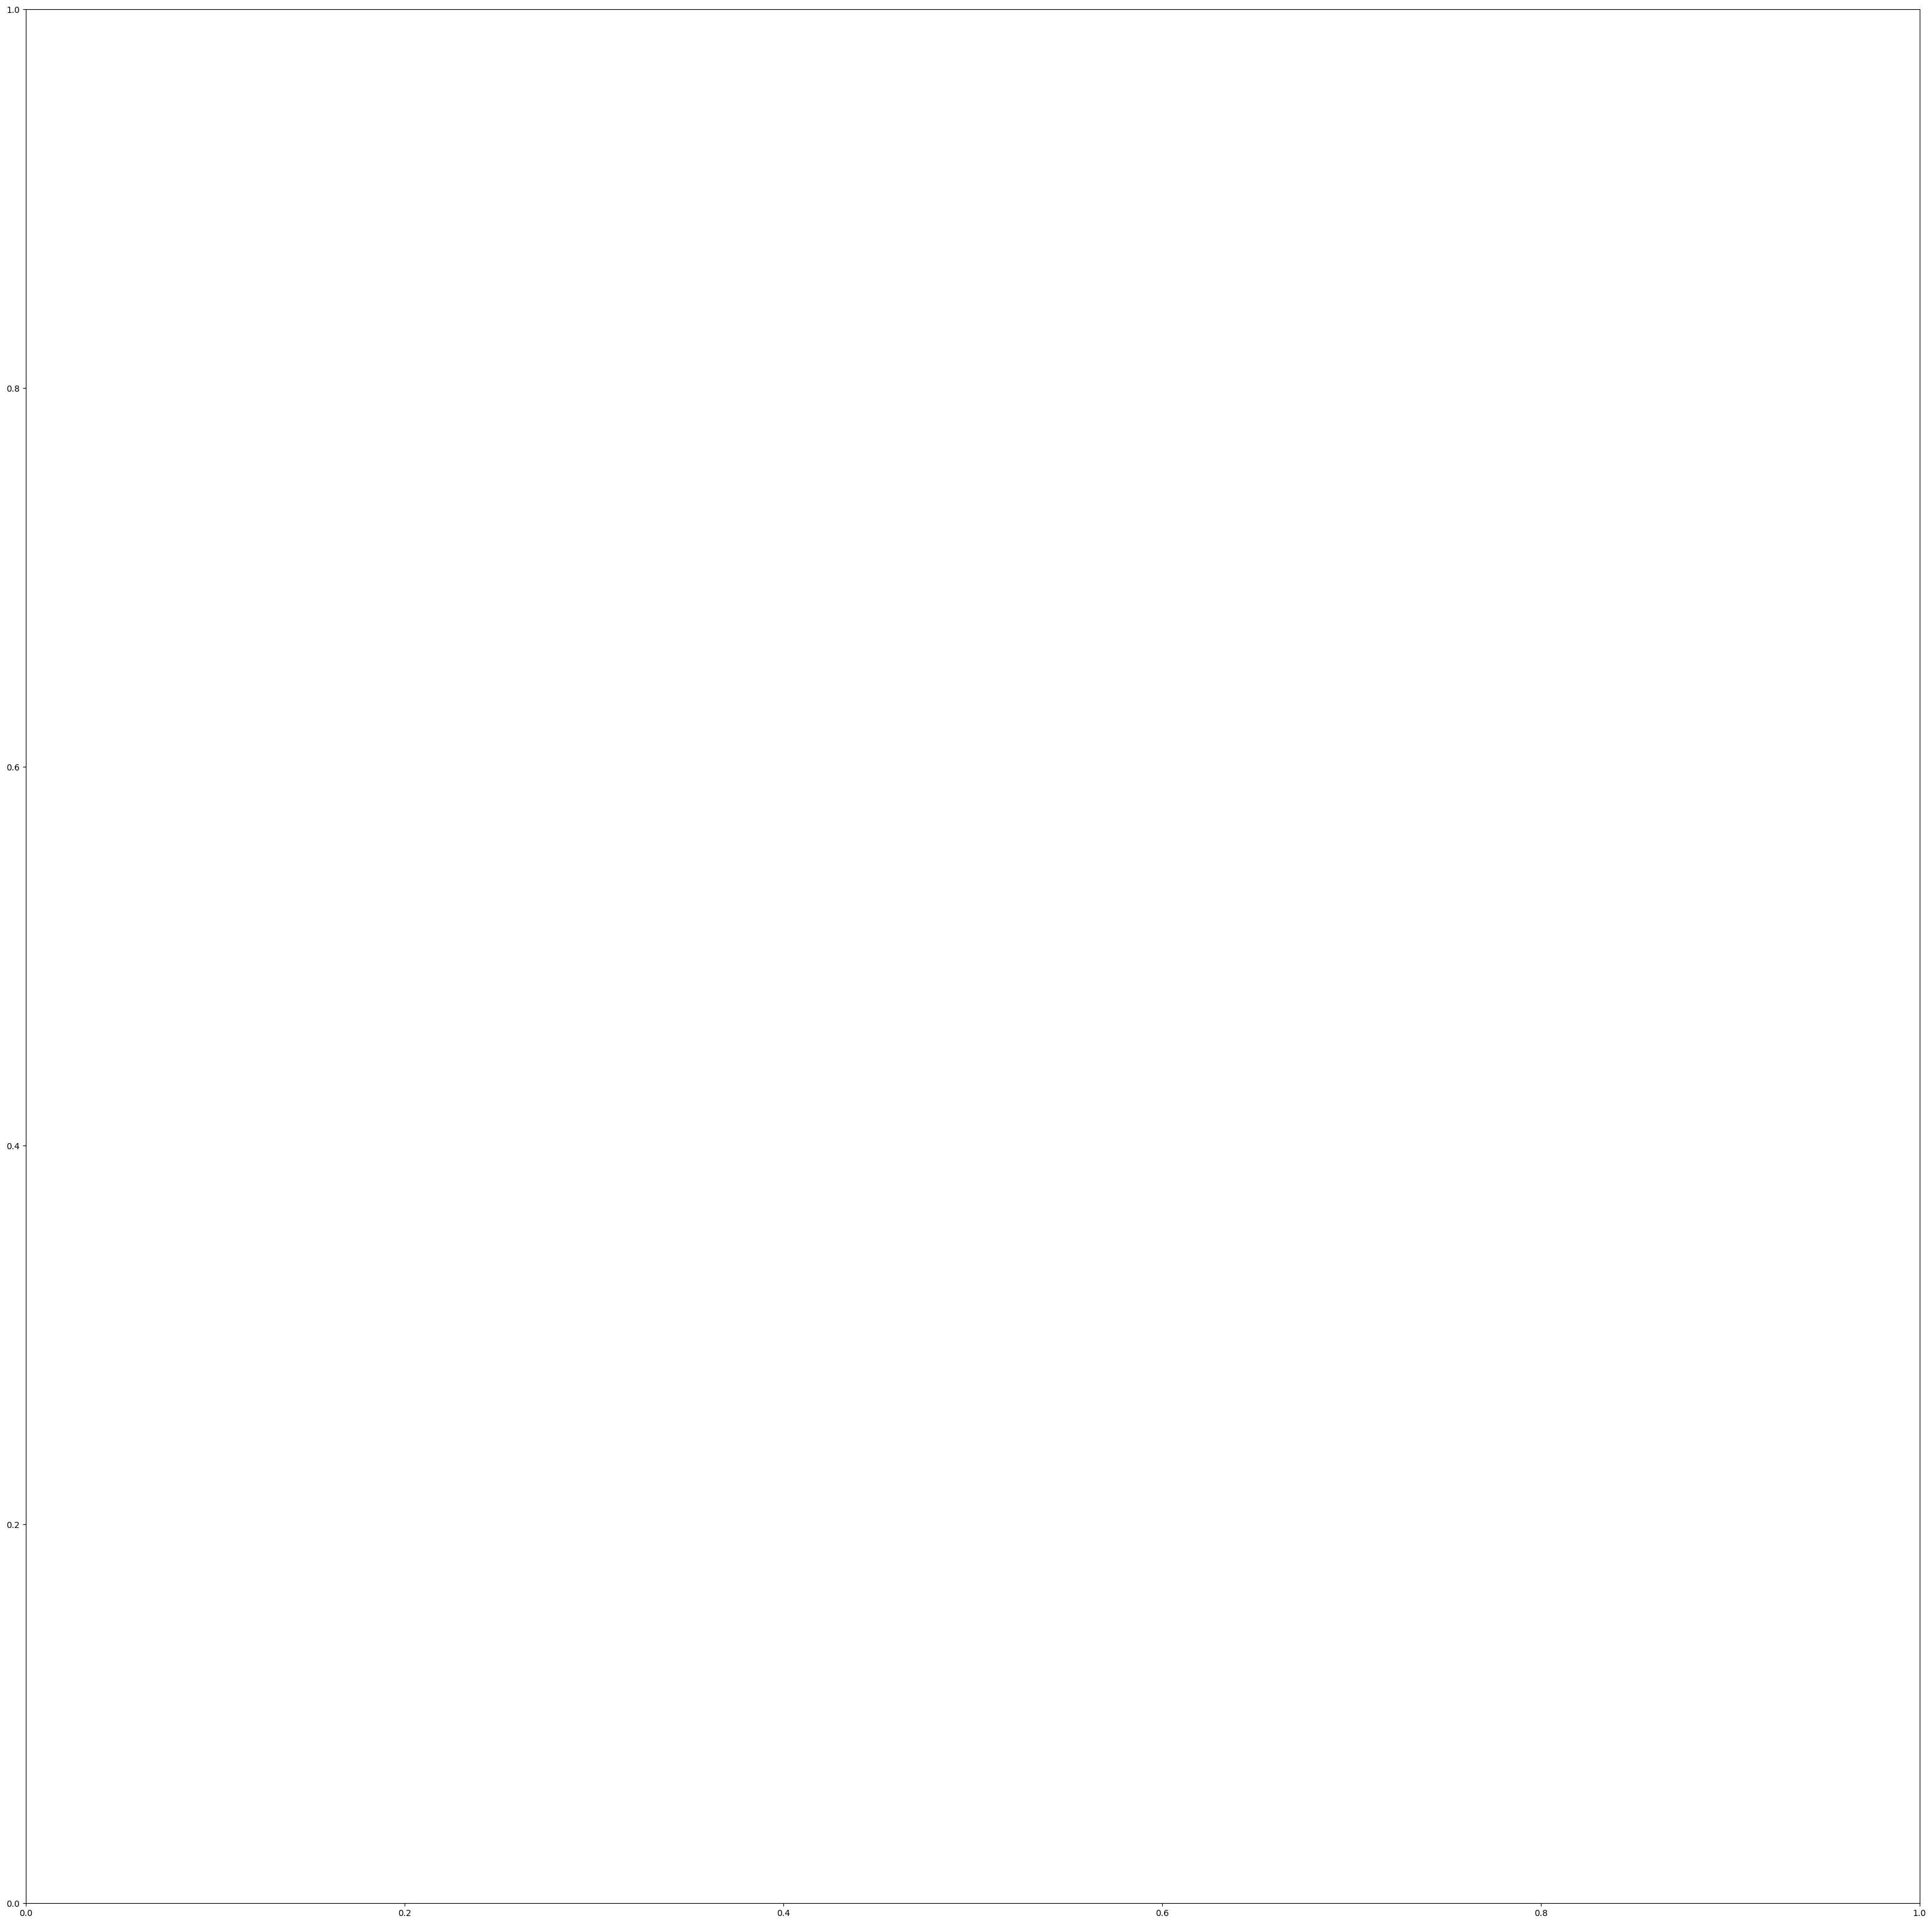

In [19]:
ax = gdf.plot('clusters_2', categorical=True, legend=True, figsize=(40, 40), cmap='tab20')
ax.set_axis_off()
# boundaries.boundary.plot(ax=ax, edgecolor='k')

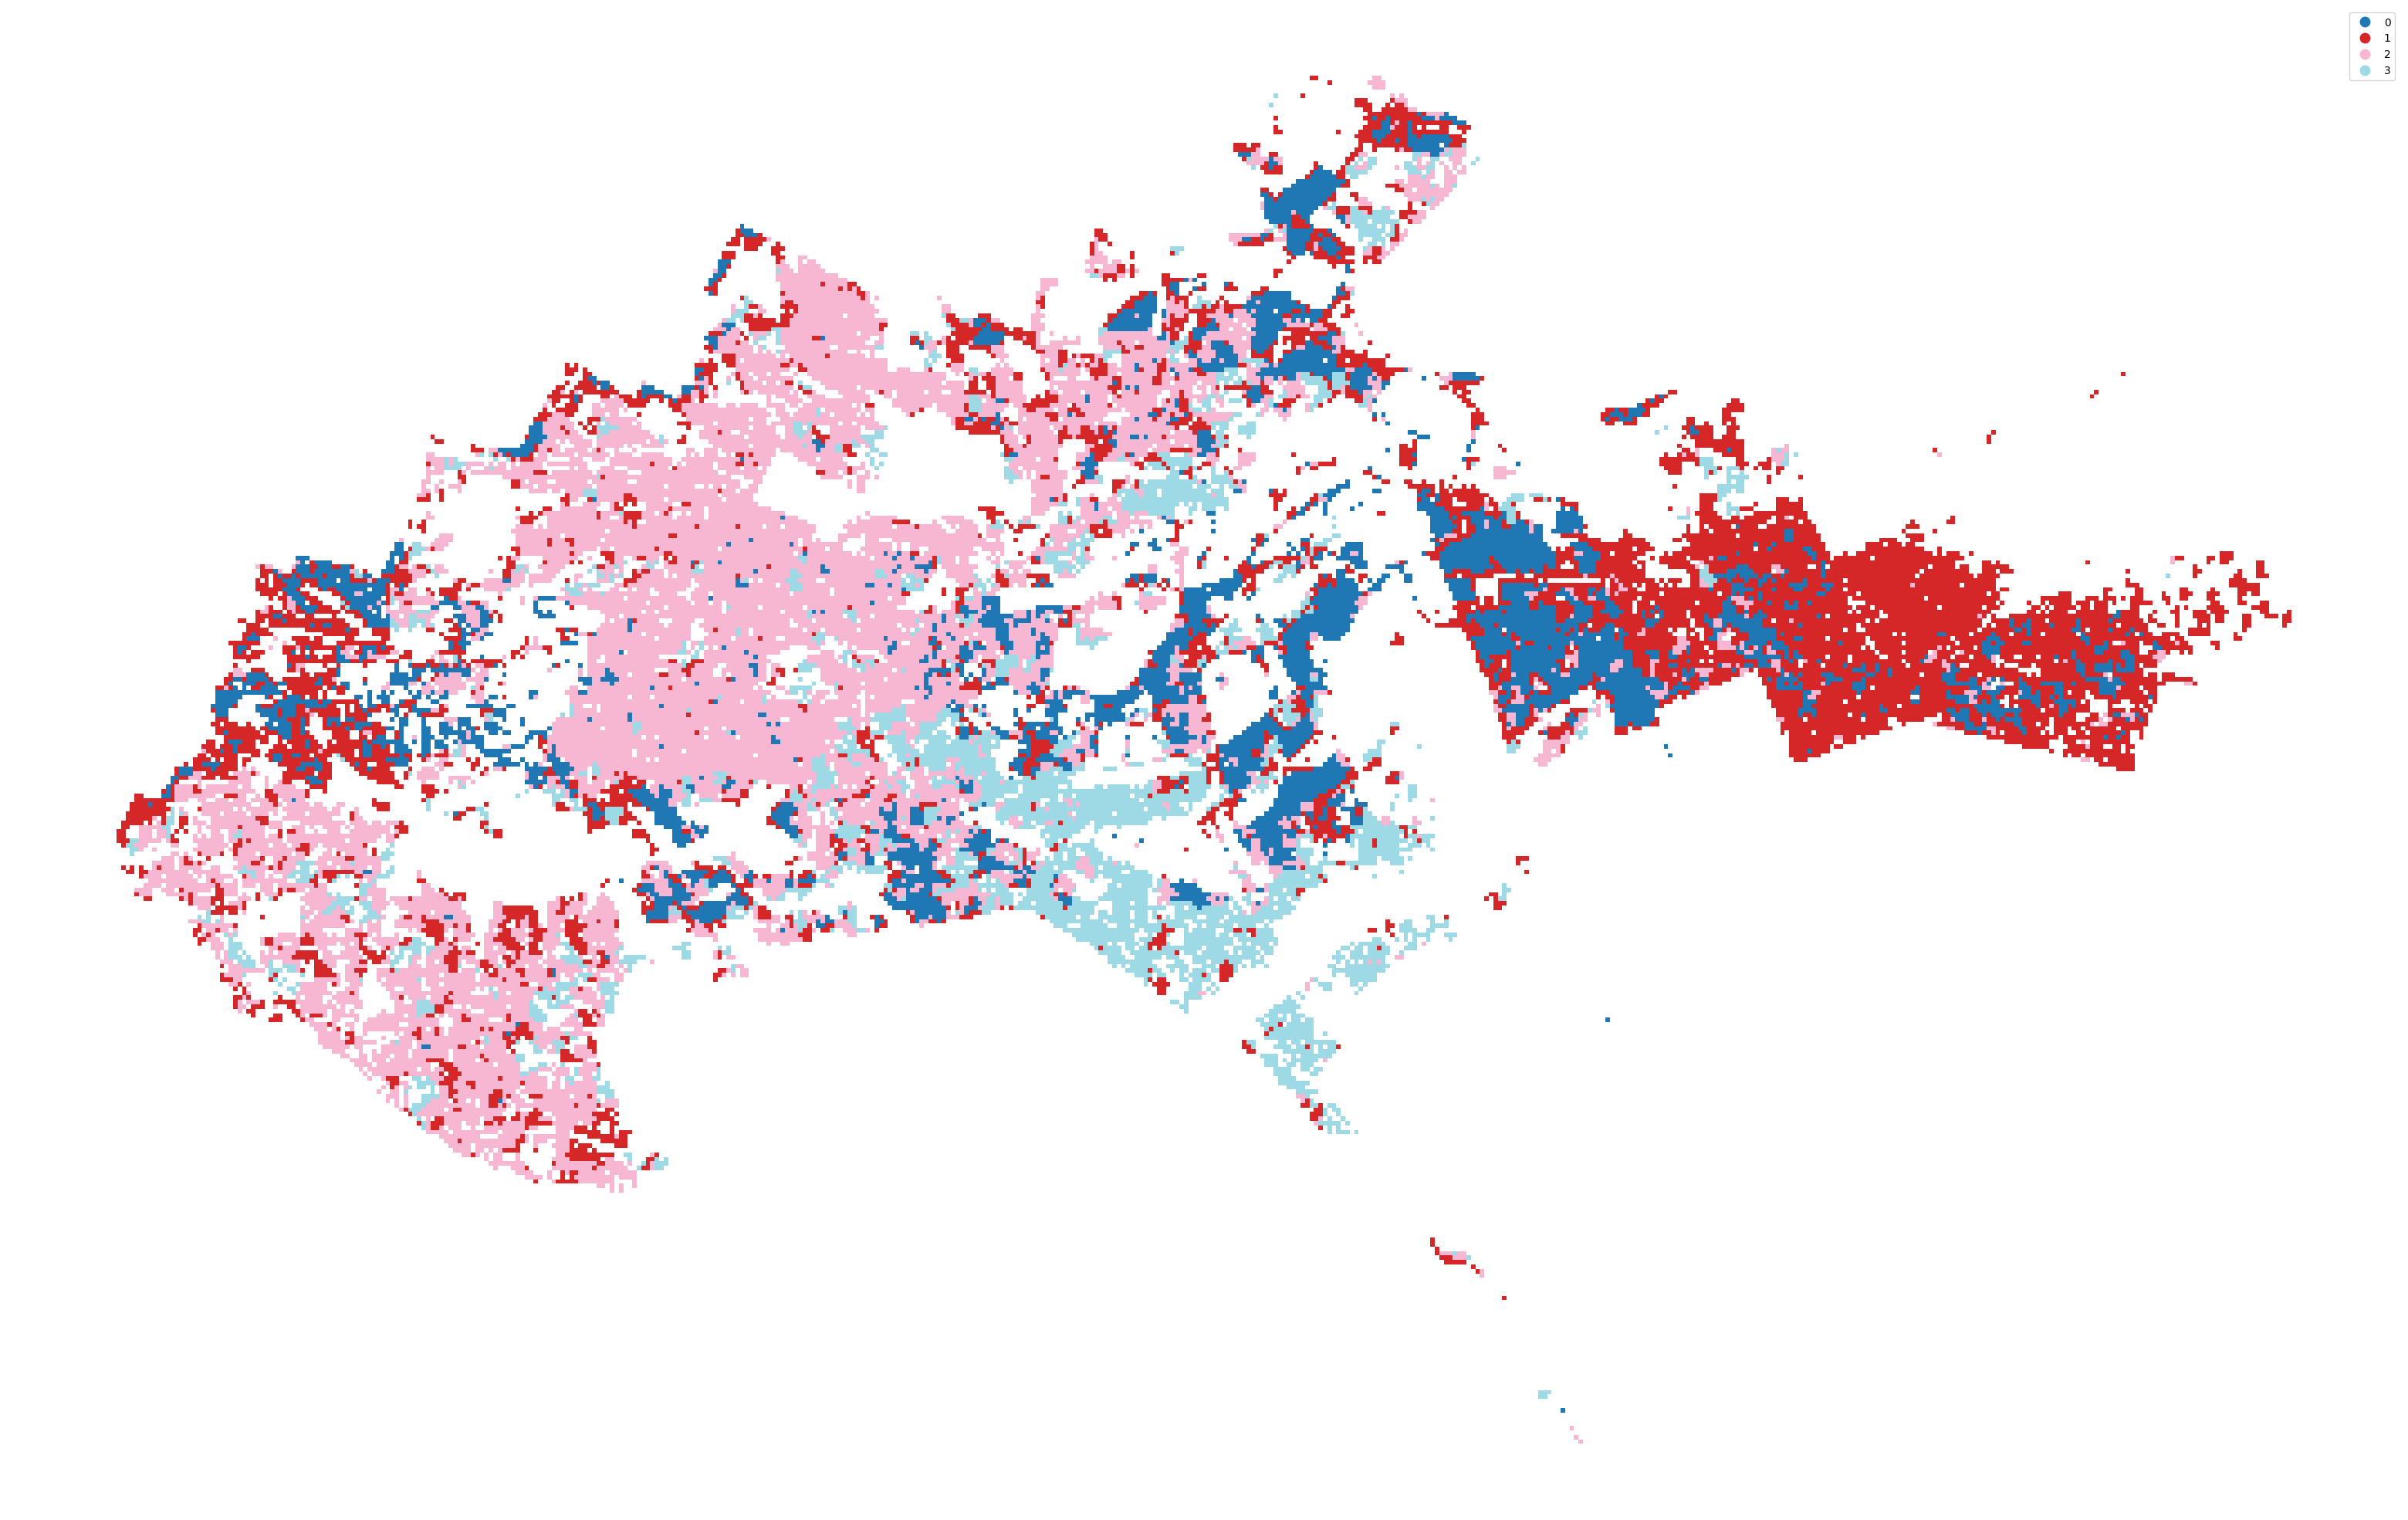

In [20]:
ax = gdf.plot('clusters_4', categorical=True, legend=True, figsize=(40, 40), cmap='tab20')
ax.set_axis_off()
# boundaries.boundary.plot(ax=ax, edgecolor='k')

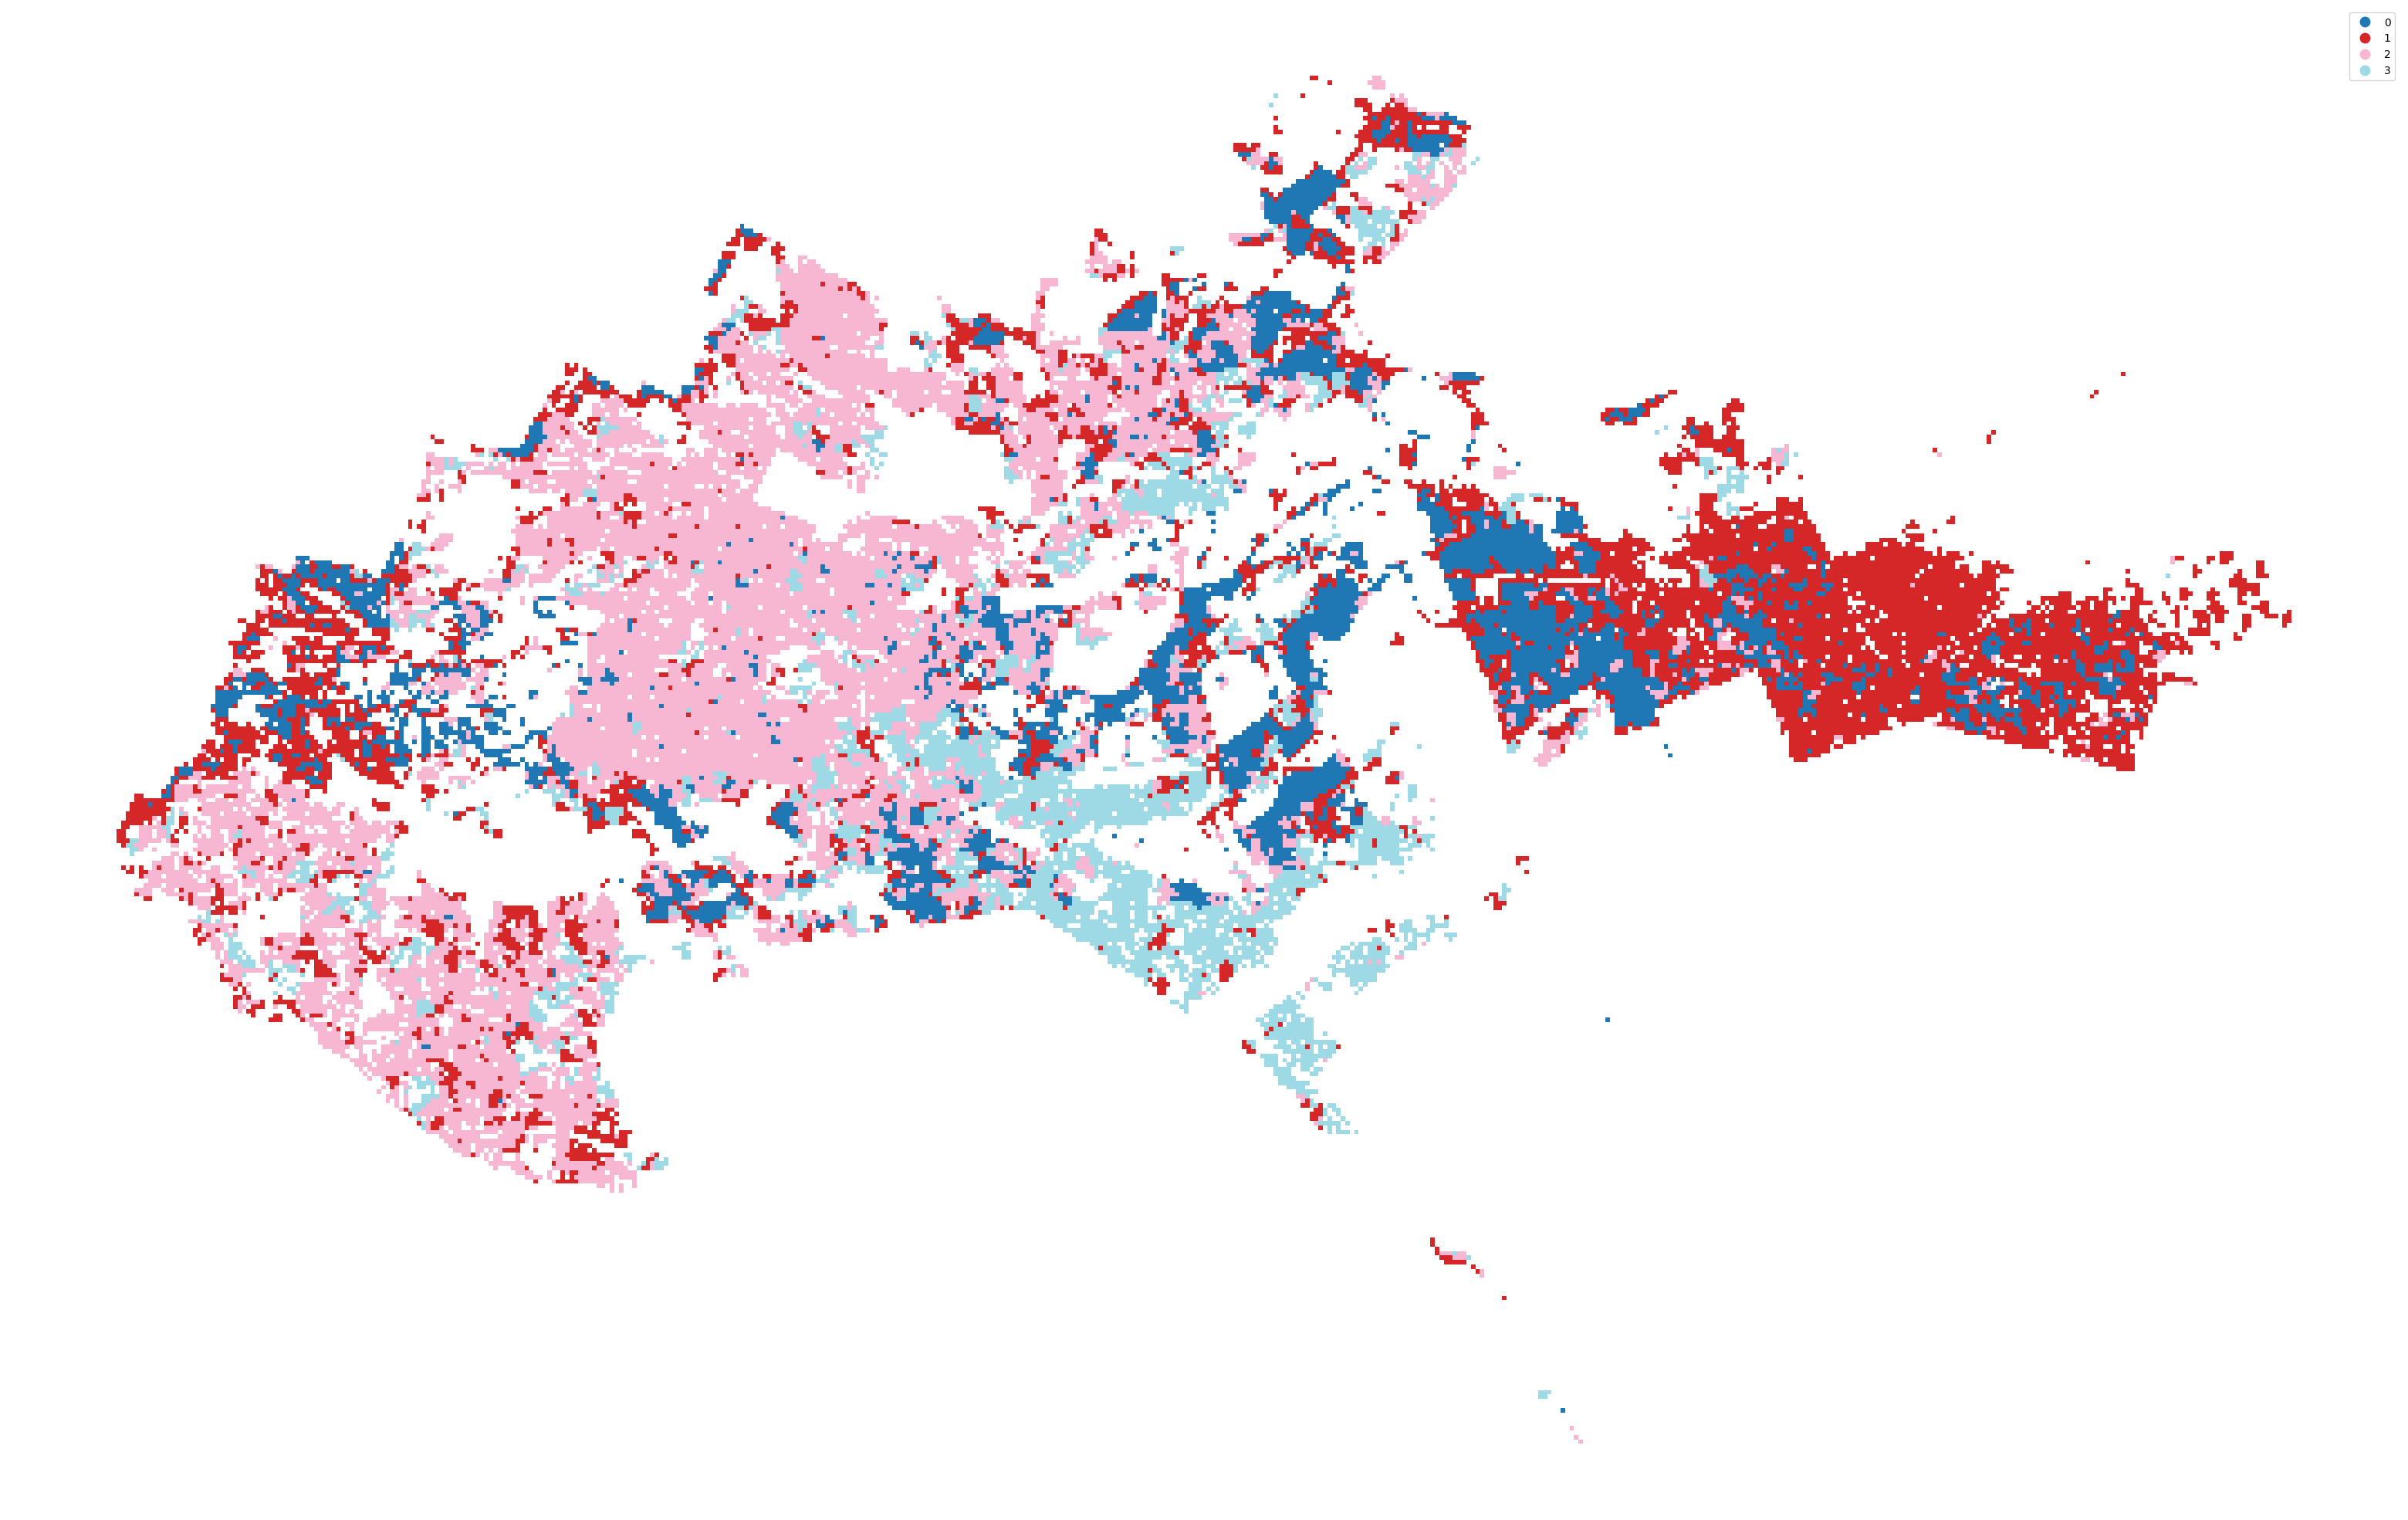

In [21]:
ax = formal_grids.plot('clusters_4', categorical=True, legend=True, figsize=(40, 40), cmap='tab20')
ax.set_axis_off()
# boundaries.boundary.plot(ax=ax, edgecolor='k')

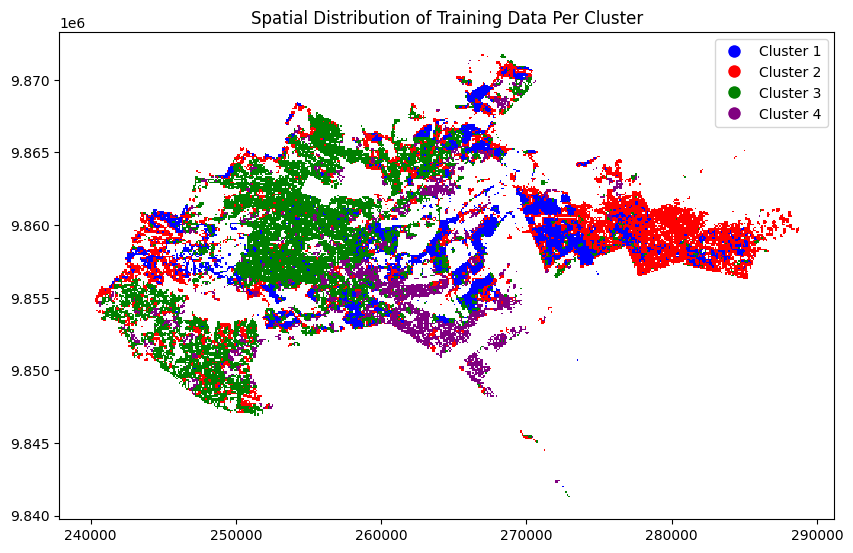

In [24]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Assuming 'formal_train_grids' is your GeoDataFrame and it includes a 'clusters_4' column with values 0, 1, 2, and 3
# Separate the blocks into GeoDataFrames based on the 'clusters_4' column
cluster_1 = formal_grids[formal_grids['clusters_4'] == 0]
cluster_2 = formal_grids[formal_grids['clusters_4'] == 1]
cluster_3 = formal_grids[formal_grids['clusters_4'] == 2]
cluster_4 = formal_grids[formal_grids['clusters_4'] == 3]

# Create a plot with different colors for each cluster
fig, ax = plt.subplots(figsize=(10, 8))  # Set the figure size here

cluster_1.plot(ax=ax, color='blue', label='Cluster 1')
cluster_2.plot(ax=ax, color='red', label='Cluster 2')
cluster_3.plot(ax=ax, color='green', label='Cluster 3')
cluster_4.plot(ax=ax, color='purple', label='Cluster 4')

# Create custom legend handles
legend_handles = [
    Line2D([0], [0], marker='o', color='w', label='Cluster 1',
           markerfacecolor='blue', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Cluster 2',
           markerfacecolor='red', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Cluster 3',
           markerfacecolor='green', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Cluster 4',
           markerfacecolor='purple', markersize=10)
]

# Add the custom legend to the plot
ax.legend(handles=legend_handles)

plt.title('Spatial Distribution of Training Data Per Cluster')

# Show the plot
plt.show()


2    12869
1     9018
0     5349
3     4058
Name: clusters_4, dtype: int64


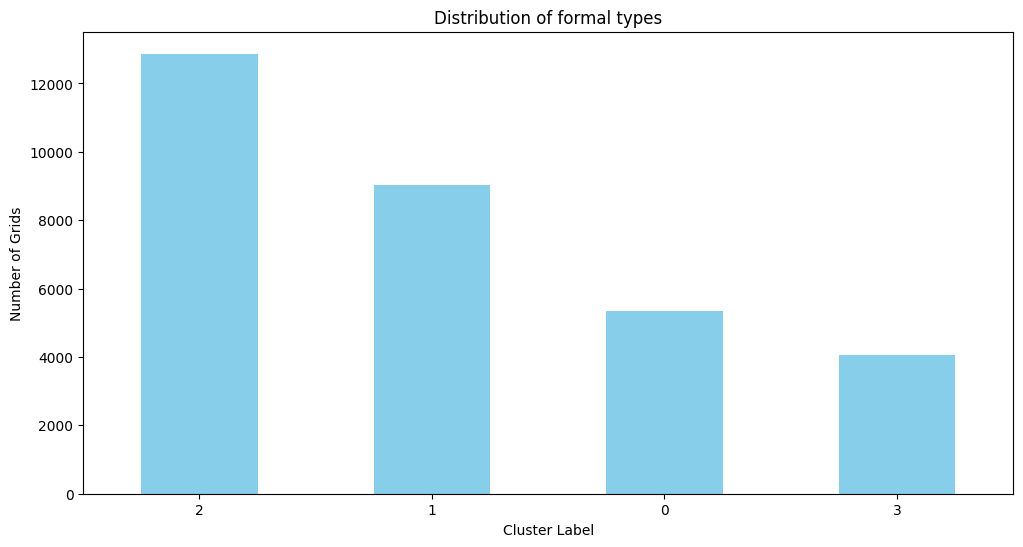

In [102]:
# Count the number of grids for each unique value in the 'NAME_2' column
counts_per_cluster = formal_grids['clusters_4'].value_counts()
print(counts_per_cluster)

# Create a bar chart for the distribution
counts_per_cluster.plot(kind='bar', color='skyblue', figsize=(12, 6))

# Add labels and title
plt.xlabel('Cluster Label')
plt.ylabel('Number of Grids')
plt.title('Distribution of formal types')

# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=0)


# Show the bar chart
plt.show()

In [96]:
#selecting equal number of grids per formal arrea cluster type

# Set a random seed for reproducibility
np.random.seed(42)

# Number of formal grids to select per sub-county
num_grids_per_per_cluster = 1280 // 4

# Create an empty GeoDataFrame to store selected formal grids
selected_formal_grids_gdf = gpd.GeoDataFrame()

for cluster_type in formal_grids['clusters_4'].unique():
    # Filter formal grids for the current sub-county
    formal_grids_per_cluster = formal_grids[formal_grids['clusters_4'] == cluster_type]
    
    # Perform random selection
    selected_grids = formal_grids_per_cluster.sample(n=num_grids_per_per_cluster)
    
    # Append selected grids to the GeoDataFrame
    selected_formal_grids_gdf = selected_formal_grids_gdf.append(selected_grids)

# Reset index of the final GeoDataFrame
selected_formal_grids_gdf.reset_index(drop=True, inplace=True)

selected_formal_grids_gdf.head()

/tmp/ipykernel_232/868237206.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected_formal_grids_gdf = selected_formal_grids_gdf.append(selected_grids)
/tmp/ipykernel_232/868237206.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected_formal_grids_gdf = selected_formal_grids_gdf.append(selected_grids)
/tmp/ipykernel_232/868237206.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected_formal_grids_gdf = selected_formal_grids_gdf.append(selected_grids)
/tmp/ipykernel_232/868237206.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected_formal_grids_gdf = selected_formal_grids_gdf.append(selected_grids)


,ORIG_FID,Dist_ATM,Dist_Banks,Dist_Clin,Dist_Col,Dist_ComC,Dist_Dump,Dist_Hosp,Dist_Indus,Dist_Kind,...,bERI_Gini_,bERI_Shann,bERI_Simps,bERI_Theil,grid_area,blg_densit,intersecti,coverage_p,geometry,clusters_4
0,31226,13152.90,4726.520,4925.44,16422.200,565.685,16924.80,3801.32,5515.430,16056.200,...,0.017469,0.507985,0.699082,0.002039,10000.0,0.0014,10000.000000,100.000000,"POLYGON ((281883.509 9858865.525, 281783.509 9...",1
1,35556,10632.00,2420.740,2580.70,14011.800,3255.760,14454.40,1486.61,4396.590,13670.400,...,0.015446,0.527425,0.705740,0.001028,10000.0,0.0014,10000.000000,100.000000,"POLYGON ((279083.509 9857865.525, 278983.509 9...",1
2,14894,1843.91,509.902,1486.61,984.886,1746.420,1100.00,1166.19,707.107,1081.670,...,0.011864,0.371422,0.802572,0.001142,10000.0,0.0002,10000.000000,100.000000,"POLYGON ((263083.509 9862565.525, 262983.509 9...",1
3,3623,2376.97,447.214,2668.33,4741.310,6964.190,7810.25,2475.88,2785.680,707.107,...,0.012713,0.480893,0.763273,0.001246,10000.0,0.0007,9795.127223,97.951272,"POLYGON ((255183.509 9866265.525, 255083.509 9...",1
4,36849,15305.60,6937.580,7130.92,18681.500,1200.000,19105.00,5966.57,7864.480,18324.000,...,0.009424,0.632054,0.672861,0.000482,10000.0,0.0006,10000.000000,100.000000,"POLYGON ((283883.509 9857565.525, 283783.509 9...",1


(<AxesSubplot: >, (1280, 122))

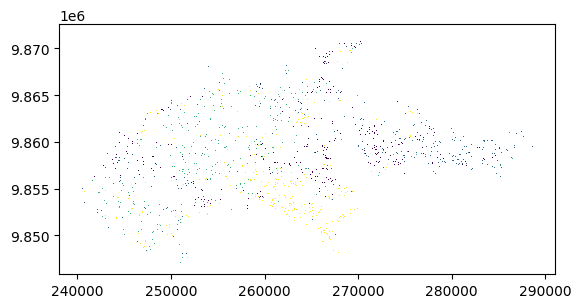

In [99]:
selected_formal_grids_gdf.plot(column = 'clusters_4'), selected_formal_grids_gdf.shape

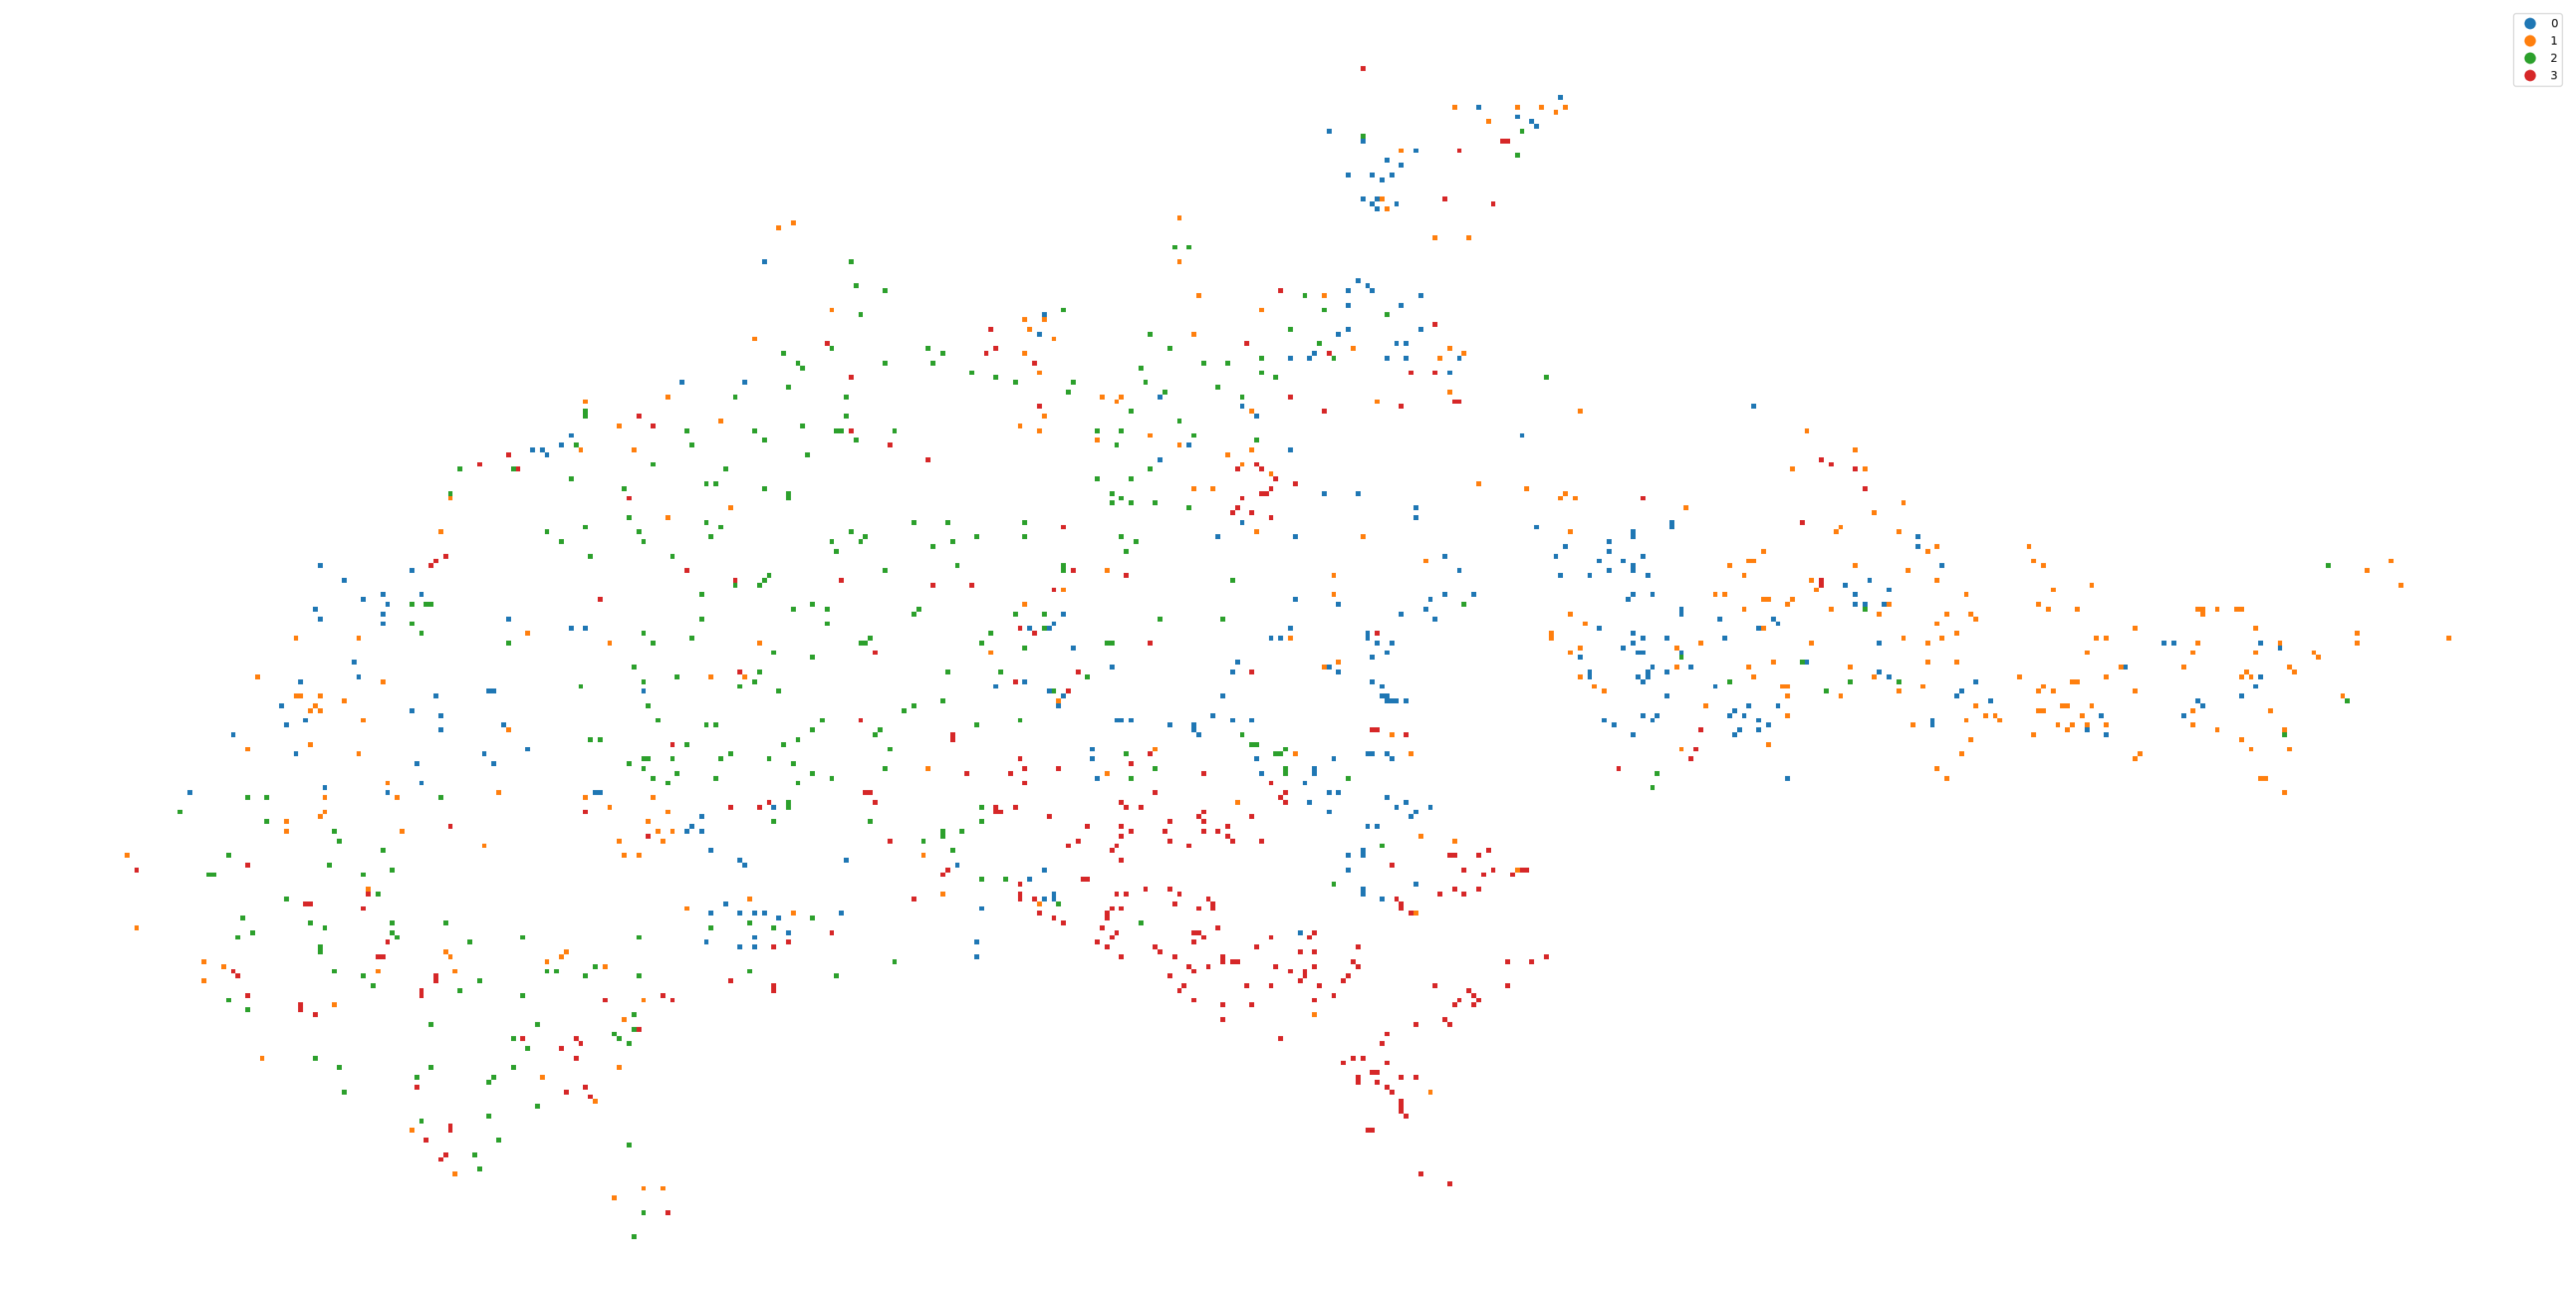

In [105]:
# Define your own color list with 17 distinct colors
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Create a custom colormap
custom_cmap = ListedColormap(custom_colors)

ax = selected_formal_grids_gdf.plot('clusters_4', categorical=True, legend=True, figsize=(40, 40), cmap=custom_cmap)
ax.set_axis_off()
# boundaries.boundary.plot(ax=ax, edgecolor='k')

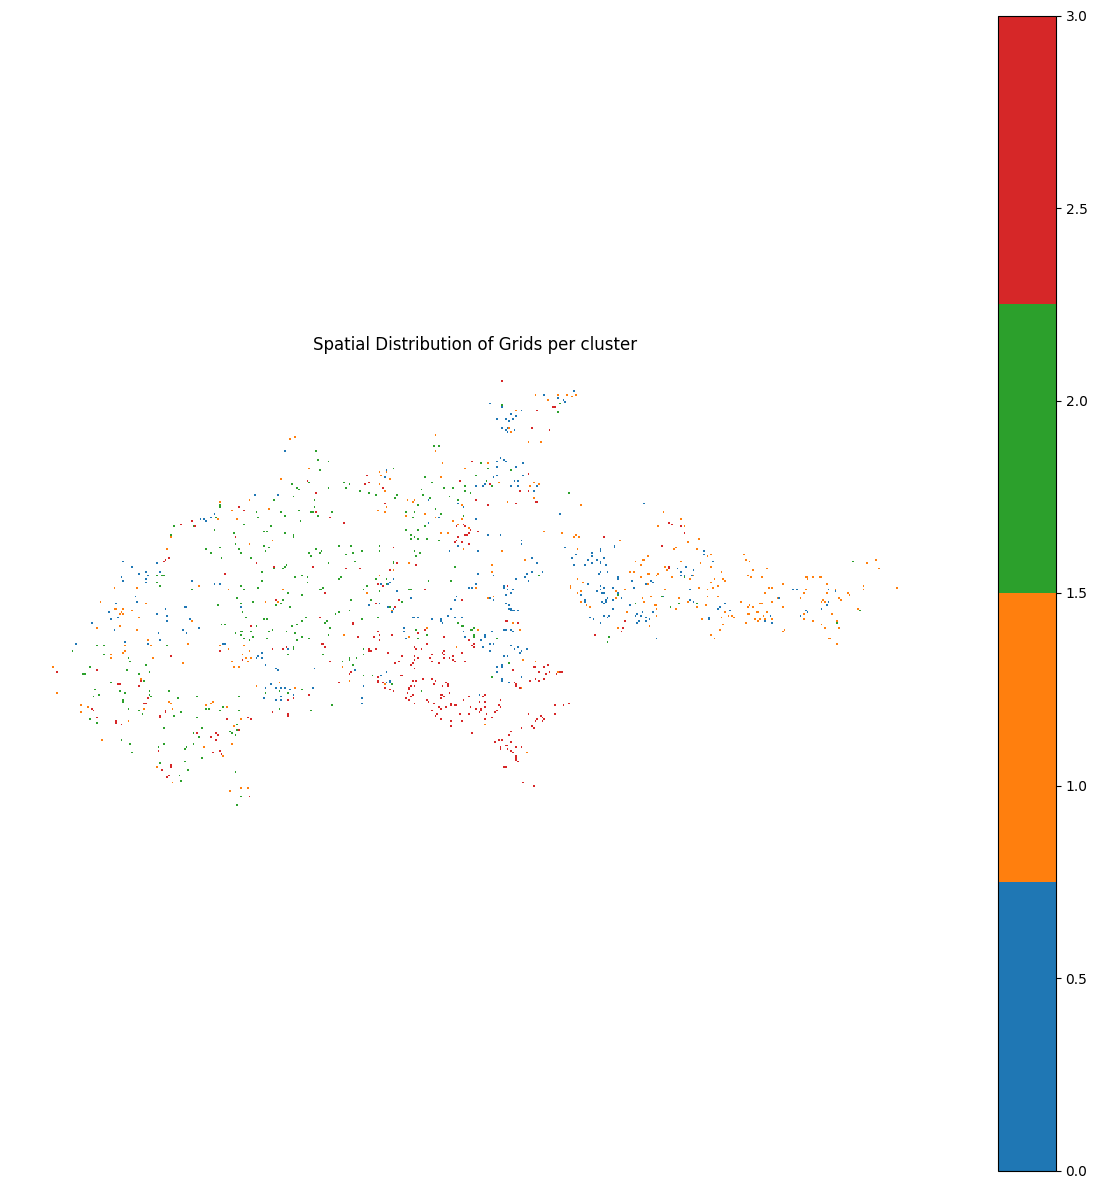

In [104]:
from matplotlib.colors import ListedColormap

# Assuming 'combined_gdf' is your GeoDataFrame that contains the 'NAME_2' column and geometry information

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(15, 15))


# # Define your own color list with 17 distinct colors
# custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
#                  '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
#                  '#1a55FF', '#2aFF78', '#d4EE00', '#FF5733', '#33FF57',
#                  '#571845', '#900C3F']

# Define your own color list with 17 distinct colors
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Create a custom colormap
custom_cmap = ListedColormap(custom_colors)

# Plot the spatial distribution of grids, color-coded by the 'NAME_2' column
# Use a colormap (e.g., 'Set3') for better color distinction
selected_formal_grids_gdf.plot(column='clusters_4', ax=ax, legend=True, cmap=custom_cmap)

# Add axis labels and a title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Spatial Distribution of Grids per cluster')

# Remove the axis for a cleaner look
ax.set_axis_off()

# Show the plot
plt.show()


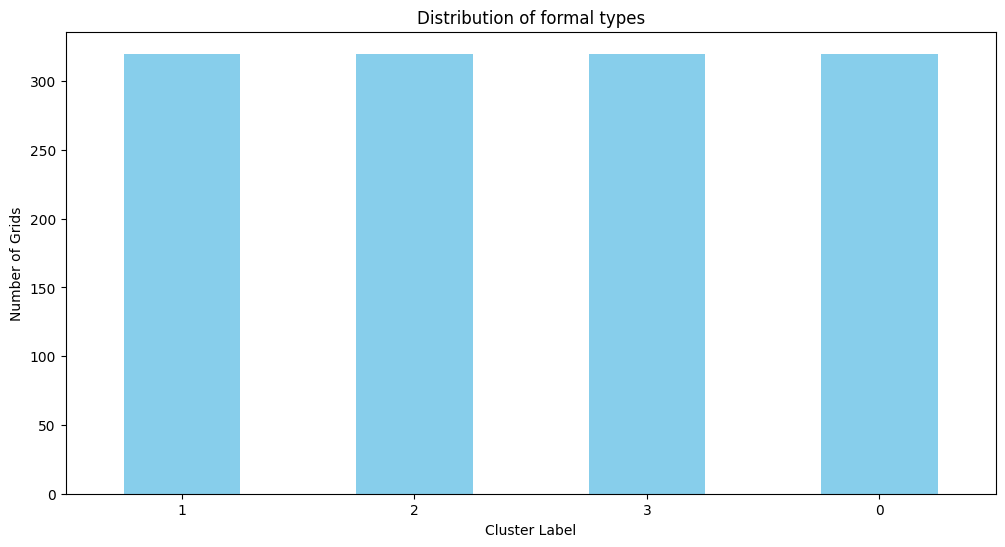

In [98]:
# Count the number of grids for each unique value in the 'NAME_2' column
counts_per_cluster = selected_formal_grids_gdf['clusters_4'].value_counts()

# Create a bar chart for the distribution
counts_per_cluster.plot(kind='bar', color='skyblue', figsize=(12, 6))

# Add labels and title
plt.xlabel('Cluster Label')
plt.ylabel('Number of Grids')
plt.title('Distribution of formal types')

# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=0)


# Show the bar chart
plt.show()

In [101]:
print(counts_per_cluster)

1    320
2    320
3    320
0    320
Name: clusters_4, dtype: int64


In [106]:
#load slum_training_grids and combine the two datasets 
save_path = '/home/jovyan/private/Thesis/nai_train_data/'
selected_formal_grids_gdf.to_file(save_path + 'selected_formal_grids.shp')